> > > > > # Prepared By : Chaimaa Bouabd

## Context

Enakl is a bus sharing transportation solution that focuses on offering a reliable, comfortable and secure mobility service for commuters: Based on what we think the market of workers needs (mobility from home to work and vice versa), we create lines and open them for reservations (pre-booking). Our objective is to have at least 50% fill rate for our 20-seats buses and to ensure high customer satisfaction ratings.  


You have access to a google sheet that has all the bookings from this year.

* Google sheet link: https://docs.google.com/spreadsheets/d/1vokpxy5k88m0_rfTKDYZMTxWepQKlkDYG14netFb8zY
* Google sheet name: bookings_data

The data should be self-explanatory.
Not all columns are needed for this challenge.

Some important specifications:

- date_booking captures when the user books a ride (either directly via the app or indirectly when a support agent or a manager does that for them)
- date_ride captures the actual date of the ride
- A booking can be canceled (by the user directly or an agent/manager) as long as the day/time of the booked ride didn't happen.
- If a booking is not canceled and the user doesn't show up the day/time of the ride, the driver cancels the ride and the `booking_status` will be logged as 'Canceled by driver'
- Once a ride is done (user dropped off at destination point), we ask the user to rate the service and the driver via the app
- date_joined captures when the user installed the app and created an account



## Asks:


### Challenge 1: Business Curiosity & Data Insights

Conduct some exploratory data analysis (EDA) to understand the data further and uncover some insights.
Explain what you did and why.
Summaries the insights you found.  


### Challenge 2: Busline performance (You have to write the query using SQL)

As mentioned in the introduction, we care a lot about having a high enough fill-rate of our buses (at least 50%) to ensure that we are profitable.

We want to analyse how our current buslines are performing by doing the following:

For each line:
- We want to find out when it was launched
- We will call the week of the launch week_0 (week is from monday to sunday)
- Then for each week, we want to calculate the average fill rate during that week

The fill rate for a busline on a given day represents the percentage of occupied seats: If for busline X on 15/12/2023, we had 10 passengers, that means the fill rate for that day is 50% (all buses have 20 seats)

**IMPORTANT:** All of those metrics have to be calculated using sql in one query

The results should be displayed as:
- Pivot table with the buslines captured as row, the weeks as columns and the average weekly fill rates as metrics
- Choose another visualisation to communicate the resutls


### Challenge 3: Conclusions and perspectives

Summarise in 5 sentences what you've learned from the data and what you think we should explore and focus on next, and why.  


## What is expected from you:

- Copy this colab, add your first name to the title
- All your work should be contained in your notebook
- Once done, share your notebook with me ahmed@enakl.com (view access)

## What you will be evaluated on:

- Understanding of what the data captures
- Communicating your thoughts and results clearly
- Writing clear clean code
- Your business understanding
- Your analytical thinking
- Your python and sql skills

##Plan for this Notebook:
> ## Challenge 1: Business Curiosity & Data Insights

>1.   **Load the dataset.**
>2.   **Check for missing values.**
>3.  **Remove samples where 'busline_name' and 'driver_name' are null.**
>4. **Remove unnecessary columns.**
>5.  **Convert relevant columns to categorical.**
>6.  **Analyze booking patterns by plotting the distribution of bookings.**
>7.  **Conduct cancellation analysis.**
>8.  **Study user behavior.**
>9. **Make decisions based on the results.**

> ## Challenge 2: Busline performance (You have to write the query using SQL)
> ## Challenge 3: Conclusions and perspectives
    
    
    
    
    
    
    
    
    



# EDA

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Convert the file booking_data from gsheet format to CSV format

In [4]:
data = '/content/drive/MyDrive/Intern Assessment/bookings_data - bookings_data.csv'

## Load the Dataset:

In [5]:
import pandas as pd

# Read CSV file into a DataFrame
df = pd.read_csv(data)
df.shape


(17722, 21)

In [6]:
# Print the DataFrame
df.head()

booking_id  booked_from date_booking  number_passengers  \
0       19294  CALL_CENTER   2023-10-13                  1   
1       19468          APP   2023-10-15                  1   
2       19264  CALL_CENTER   2023-10-13                  1   
3       19527          APP   2023-10-15                  1   
4       19240  CALL_CENTER   2023-10-13                  1   

        booking_status date_cancellation  user_id date_joined  \
0       Ride Confirmed               NaN     1076  2023-03-31   
1       Ride Confirmed               NaN     2289  2023-09-03   
2       Ride Confirmed               NaN     1070  2023-03-31   
3       Ride Confirmed               NaN     3237  2023-10-11   
4  Cancelled by driver        2023-10-16     2283  2023-09-01   

                                   address_origin address_destination  ...  \
0                                       Bernoussi     Bouskoura 27182  ...   
1                 7 Rue du Rif، Mohammédia, Maroc                 CSN  ...   
2                                     H.Assalam#2     Bouskoura 27182  ...   
3                     MJWM+M84, Mohammédia, Maroc                 CSN  ...   
4  334 Bd Ibn Tachfine, Casablanca 20560, Morocco           Bouskoura  ...   

    date_ride                                      busline_name  \
0  2023-10-16            LV AZHAR > BSK (via S.MOUMEN-CN) 05-23   
1  2023-10-16           LV MOHA > BSK (via Beauséjour-CN) 05-23   
2  2023-10-16            LV AZHAR > BSK (via S.MOUMEN-CN) 05-23   
3  2023-10-16           LV MOHA > BSK (via Beauséjour-CN) 05-23   
4  2023-10-16  LV BERN> BSK (via CN-BOURNAZIL-H.MO-A.SEB) 07-23   

      driver_name rating_driver  rating_service  initial_price  payment_mode  \
0   ANASS BARIGOU           NaN             NaN             30          ZERO   
1  younes belkbir           NaN             NaN             30        CREDIT   
2   ANASS BARIGOU           NaN             NaN             30          ZERO   
3  younes belkbir           NaN             NaN             30            CB   
4   RACHID NAHHAL           NaN             NaN             25          ZERO   

  discount_code                                   address_pickup  \
0       SEW1023        Amlak Bernoussi - Ecole primaire Al Marwa   
1           NaN               Mohammedia - Place de la Gare ONCF   
2       SEW1023                     Anassi - Commune Ahl Loghlam   
3           NaN                         Mohammedia - Café Nevsky   
4   LACASEM1023  H.mohammadi - Bd ibn tachfine ste générale oqba   

                                 address_dropoff  
0              Bouskoura - Parc Industriel CFCIM  
1                          Casa Nearshore - Ibis  
2              Bouskoura - Parc Industriel CFCIM  
3                          Casa Nearshore - Ibis  
4  Bouskoura - Parc Industriel Oulad Salah CFCIM  

[5 rows x 21 columns]

In [7]:
df.columns

Index(['booking_id', 'booked_from', 'date_booking', 'number_passengers',
       'booking_status', 'date_cancellation', 'user_id', 'date_joined',
       'address_origin', 'address_destination', 'is_user_anonymized',
       'date_ride', 'busline_name', 'driver_name', 'rating_driver',
       'rating_service', 'initial_price', 'payment_mode', 'discount_code',
       'address_pickup', 'address_dropoff'],
      dtype='object')

## Check for Missing Values:

In [8]:
df.isnull().sum()

booking_id                 0
booked_from                0
date_booking               0
number_passengers          0
booking_status             0
date_cancellation      15736
user_id                    0
date_joined              309
address_origin             0
address_destination        0
is_user_anonymized         0
date_ride                  0
busline_name             161
driver_name             1036
rating_driver          13823
rating_service         13811
initial_price              0
payment_mode               0
discount_code           6680
address_pickup             0
address_dropoff            0
dtype: int64

**Remove Simples where busline_name and driver_name is null**

In [9]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Remove rows where both busline_name and driver_name are null
df = df.dropna(subset=['busline_name', 'driver_name'])

# Now df will contain only rows where both busline_name and driver_name are not null

In [10]:
df.nunique()

booking_id             16686
booked_from                3
date_booking             212
number_passengers          2
booking_status             8
date_cancellation        194
user_id                  435
date_joined              206
address_origin           367
address_destination      341
is_user_anonymized         2
date_ride                179
busline_name              81
driver_name               55
rating_driver              5
rating_service             5
initial_price             19
payment_mode               3
discount_code            155
address_pickup           171
address_dropoff          173
dtype: int64

As we can notice that 15736 value null of date_cancellation which mean that 1986 of 17722 (11%) of users doesn't show up the day/time of the ride

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16686 entries, 0 to 17721
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   booking_id           16686 non-null  int64  
 1   booked_from          16686 non-null  object 
 2   date_booking         16686 non-null  object 
 3   number_passengers    16686 non-null  int64  
 4   booking_status       16686 non-null  object 
 5   date_cancellation    1783 non-null   object 
 6   user_id              16686 non-null  int64  
 7   date_joined          16411 non-null  object 
 8   address_origin       16686 non-null  object 
 9   address_destination  16686 non-null  object 
 10  is_user_anonymized   16686 non-null  bool   
 11  date_ride            16686 non-null  object 
 12  busline_name         16686 non-null  object 
 13  driver_name          16686 non-null  object 
 14  rating_driver        3899 non-null   float64
 15  rating_service       3911 non-null  

In [12]:
# Remove booking_id because it's serves no analytical purpose
df.drop(columns=['booking_id'], inplace=True)


<ipython-input-12-07b1602b378b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['booking_id'], inplace=True)


In [13]:
# Check for duplicates
duplicates = df.duplicated()

# Drop duplicates
df.drop_duplicates(inplace=True)


<ipython-input-13-c0db656da44c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [14]:
df.shape

(16653, 20)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16653 entries, 0 to 17721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   booked_from          16653 non-null  object 
 1   date_booking         16653 non-null  object 
 2   number_passengers    16653 non-null  int64  
 3   booking_status       16653 non-null  object 
 4   date_cancellation    1775 non-null   object 
 5   user_id              16653 non-null  int64  
 6   date_joined          16379 non-null  object 
 7   address_origin       16653 non-null  object 
 8   address_destination  16653 non-null  object 
 9   is_user_anonymized   16653 non-null  bool   
 10  date_ride            16653 non-null  object 
 11  busline_name         16653 non-null  object 
 12  driver_name          16653 non-null  object 
 13  rating_driver        3899 non-null   float64
 14  rating_service       3911 non-null   float64
 15  initial_price        16653 non-null 

## To Categorical Type

In [16]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# Convert single column to categorical
df['booked_from'] = df['booked_from'].astype('category')

# Convert multiple columns to categorical
cols_to_convert = ['booking_status', 'is_user_anonymized', 'busline_name', 'driver_name', 'payment_mode', 'address_pickup', 'address_dropoff']
df[cols_to_convert] = df[cols_to_convert].astype('category')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16653 entries, 0 to 17721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   booked_from          16653 non-null  category
 1   date_booking         16653 non-null  object  
 2   number_passengers    16653 non-null  int64   
 3   booking_status       16653 non-null  category
 4   date_cancellation    1775 non-null   object  
 5   user_id              16653 non-null  int64   
 6   date_joined          16379 non-null  object  
 7   address_origin       16653 non-null  object  
 8   address_destination  16653 non-null  object  
 9   is_user_anonymized   16653 non-null  category
 10  date_ride            16653 non-null  object  
 11  busline_name         16653 non-null  category
 12  driver_name          16653 non-null  category
 13  rating_driver        3899 non-null   float64 
 14  rating_service       3911 non-null   float64 
 15  initial_price      

## Analyzing the booking patterns by  ploting the distribution of bookings over time and analyze peak booking Months and days,  

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_booking' column to datetime data type
df['date_booking'] = pd.to_datetime(df['date_booking'])

# Extract date components for analysis
df['booking_date'] = df['date_booking'].dt.date
df['booking_month'] = df['date_booking'].dt.month
df['booking_day'] = df['date_booking'].dt.day
df['booking_weekday'] = df['date_booking'].dt.dayofweek  # Monday=0, Sunday=6


In [19]:
df['booking_month'].unique()

array([10, 12, 11,  9,  8,  7,  6,  5,  4])

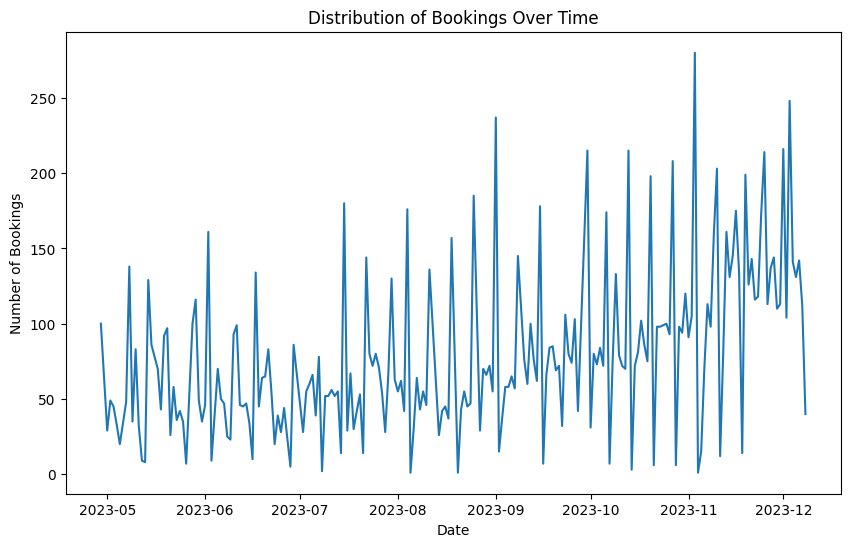

In [20]:

# Plot distribution of bookings over time
plt.figure(figsize=(10, 6))
booking_count_by_date = df.groupby('booking_date').size()
booking_count_by_date.plot()
plt.title('Distribution of Bookings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.show()


the overall distribution of bookings over time doesn't provide a clear view, breaking down the data into monthly and daily patterns can indeed help in gaining more meaningful insights.

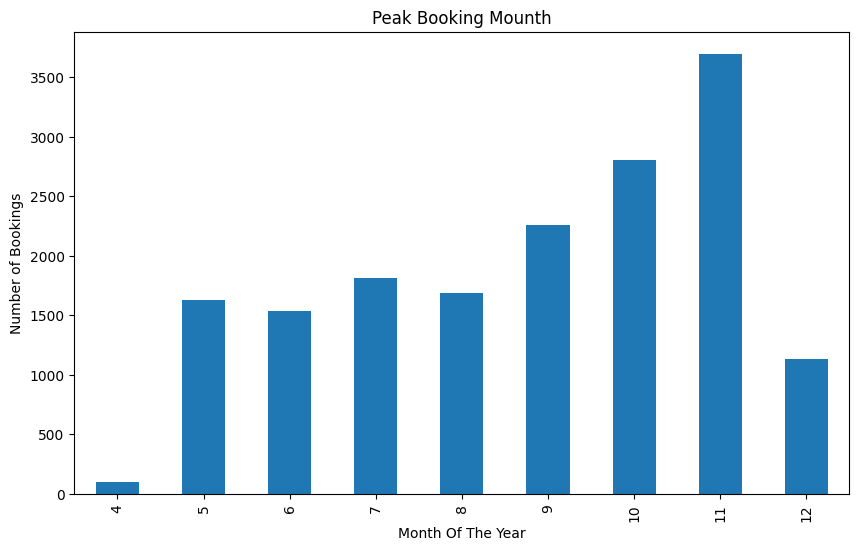

In [21]:
# Analyze peak booking hours and days
plt.figure(figsize=(10, 6))
booking_count_by_hour = df.groupby('booking_month').size()
booking_count_by_hour.plot(kind='bar')
plt.title('Peak Booking Mounth')
plt.xlabel('Month Of The Year')
plt.ylabel('Number of Bookings')
plt.show()


From this graphic, we can observe that the highest number of bookings in The Year 2023 occurred in November, with a value exceeding 3600 booking orders. Interestingly, months 1, 2, and 3 show zero bookings, indicating either a lack of data for these months or a genuine absence of booking activity during that period.

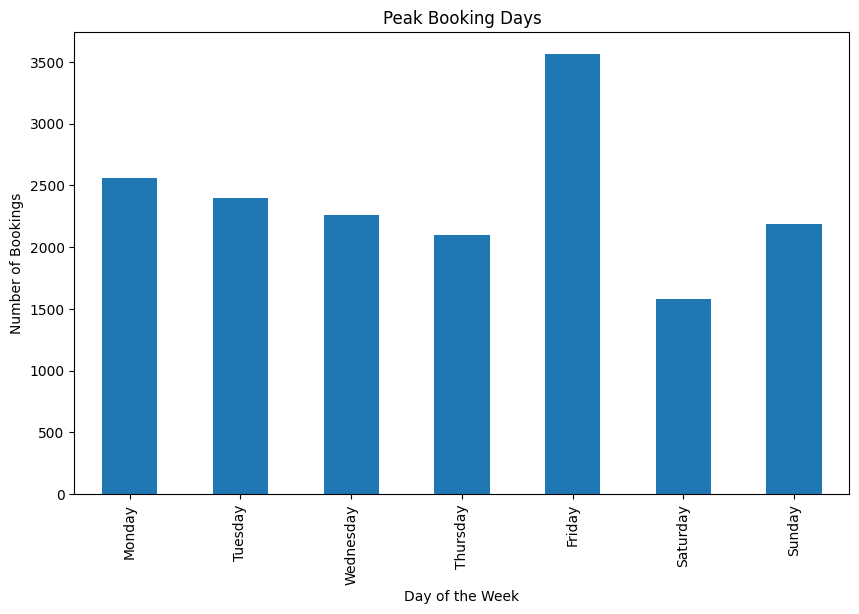

In [22]:
plt.figure(figsize=(10, 6))
booking_count_by_weekday = df.groupby('booking_weekday').size()
booking_count_by_weekday.plot(kind='bar')
plt.title('Peak Booking Days')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bookings')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

**For This graphe we can notice that  Friday is the most fruttfuul in term of booking  day  of the week compare to the other days at the contary saturday record the lowed number of booking in the week days  **

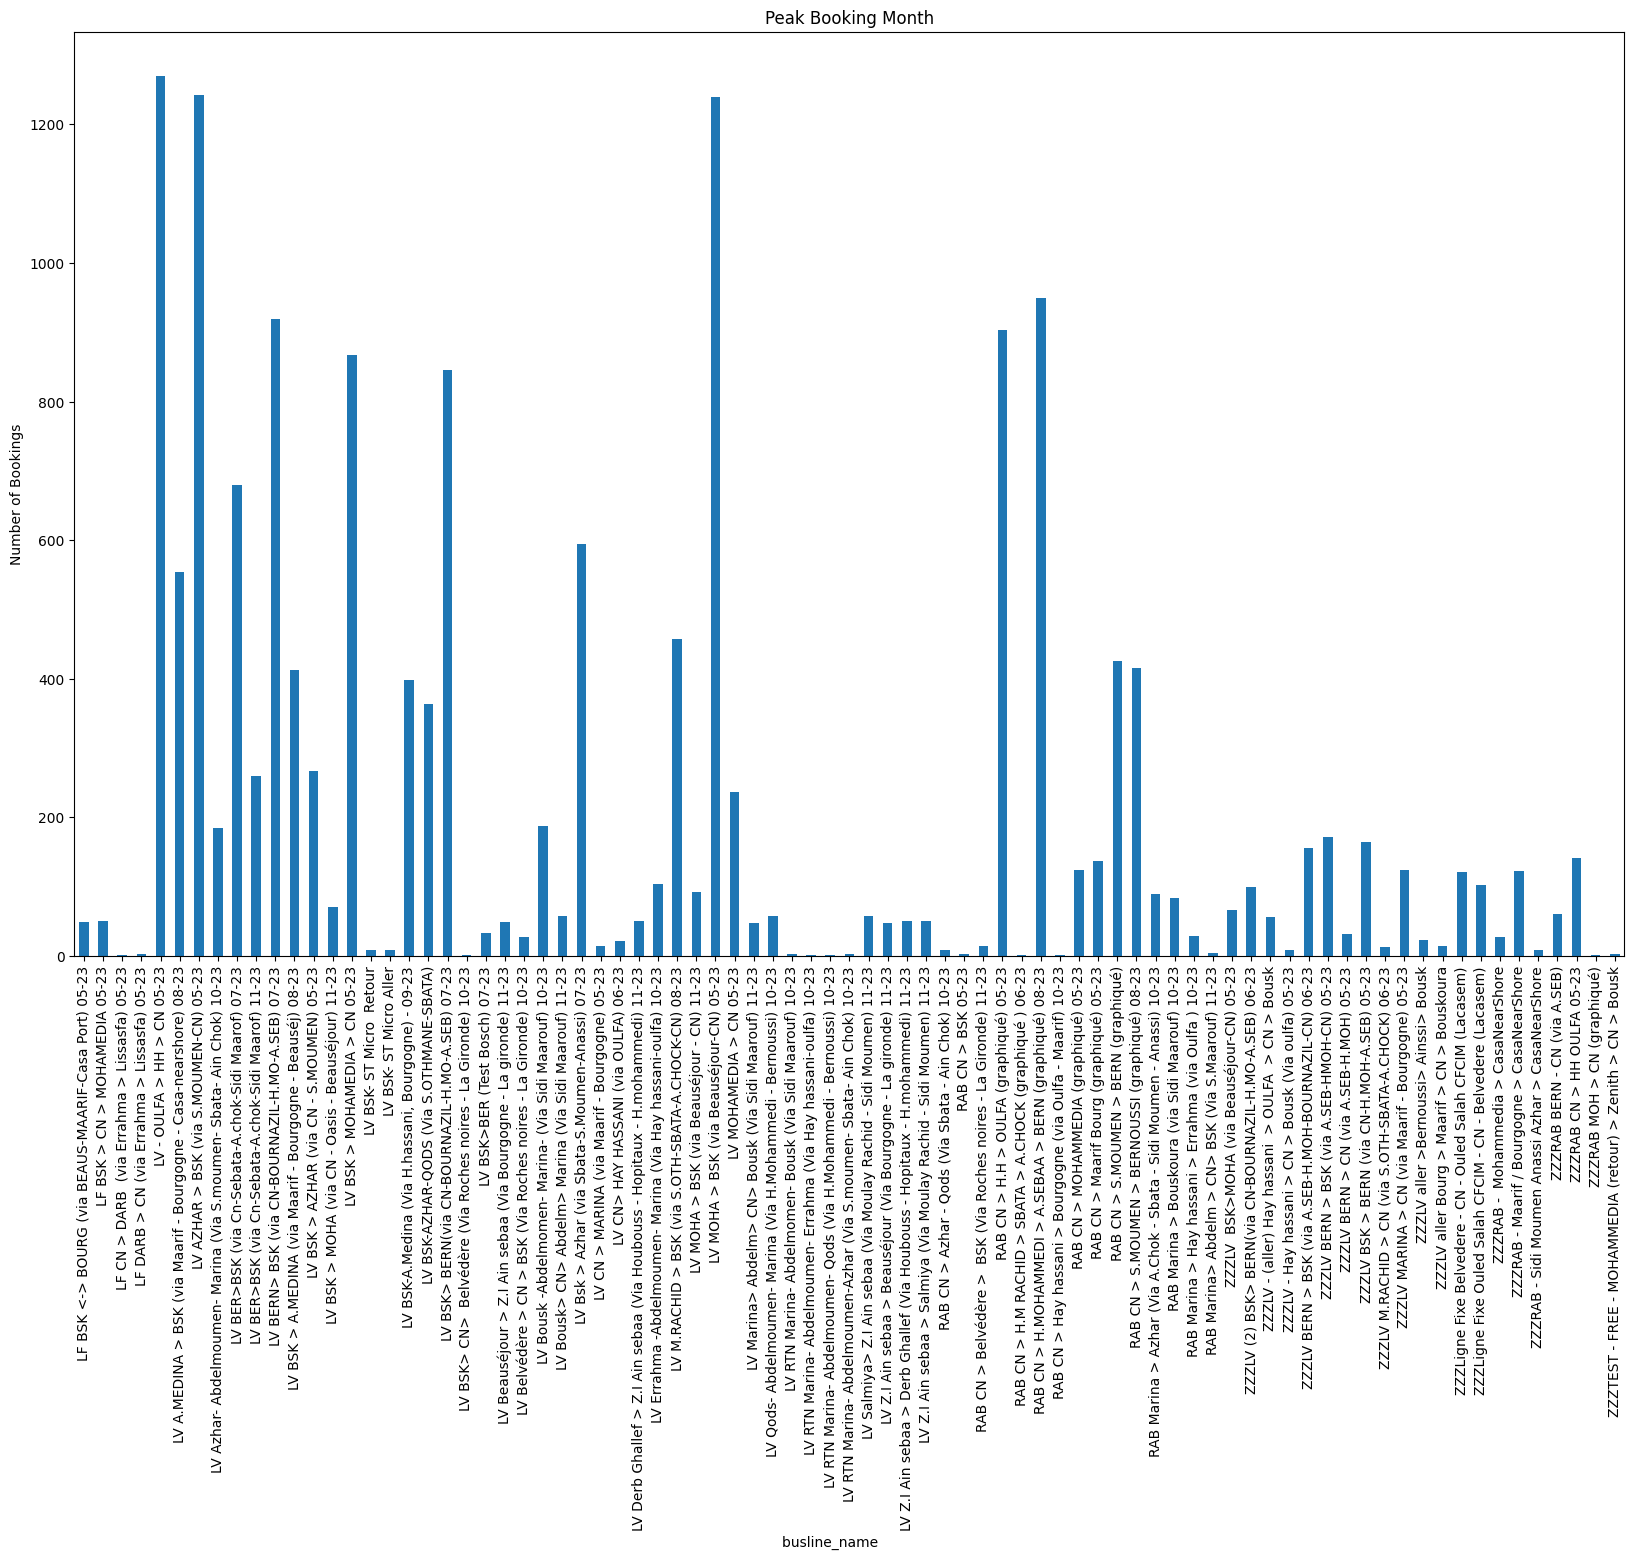

In [23]:
# Analyze peak booking Months and days
plt.figure(figsize=(20, 12))
booking_count_by_hour = df.groupby('busline_name').size()
booking_count_by_hour.plot(kind='bar')
plt.title('Peak Booking Month')
plt.xlabel('busline_name         ')
plt.ylabel('Number of Bookings')
plt.show()


### Top 10 Buslines by Number of Bookings

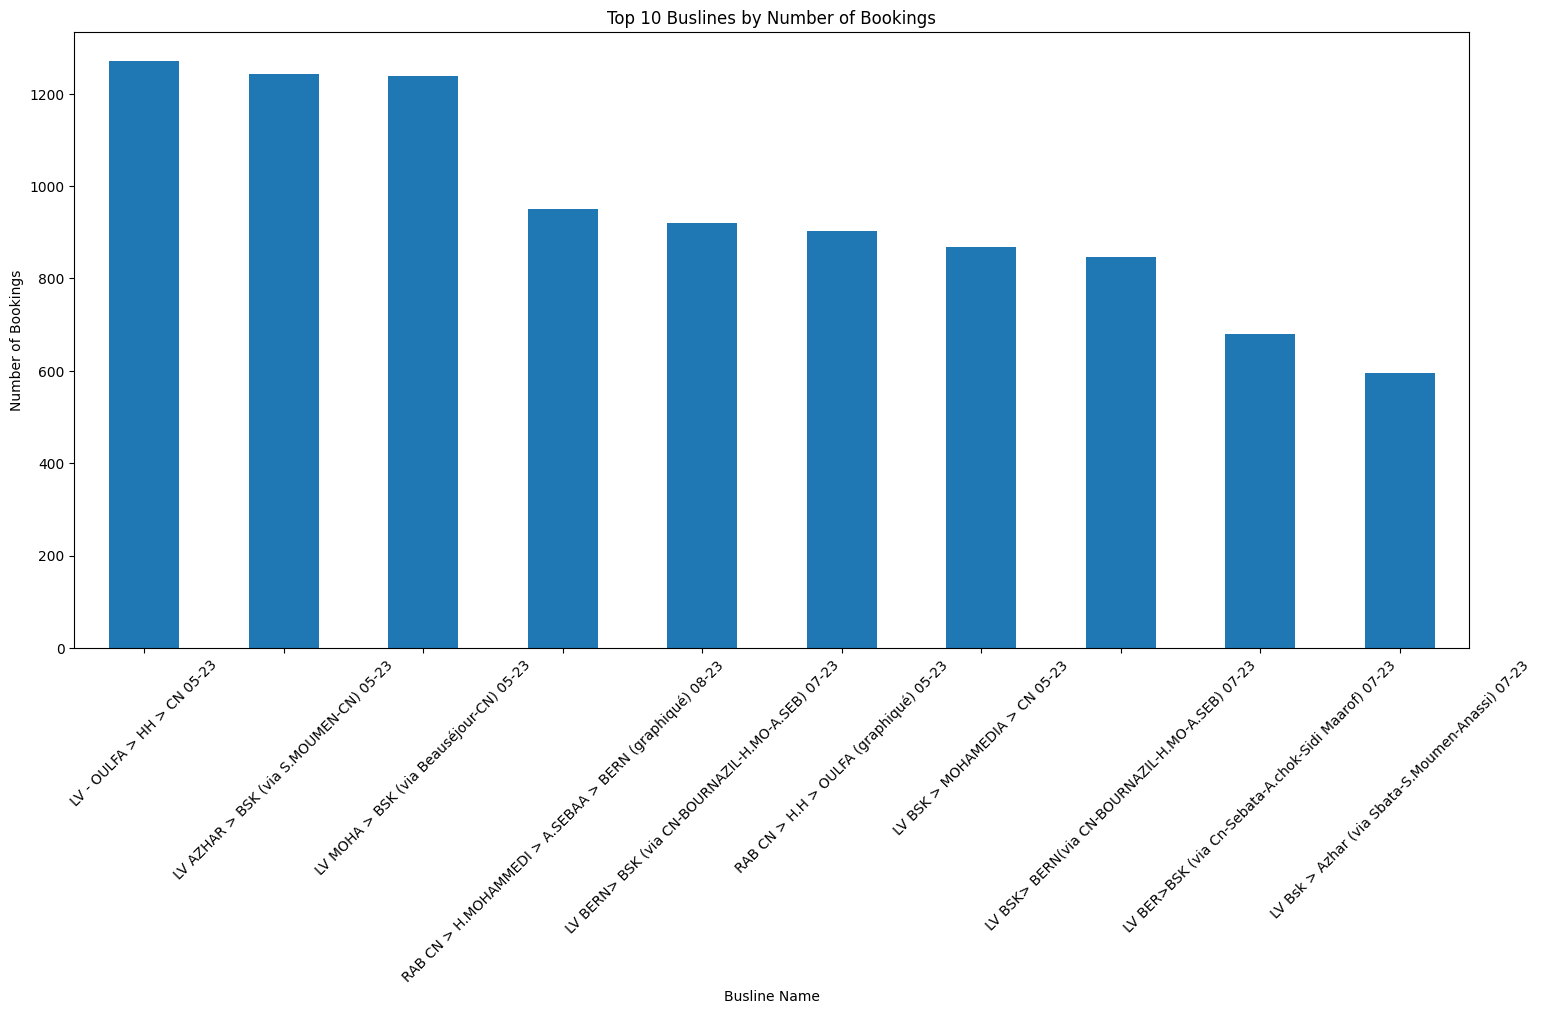

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with booking data

# Group by busline_name and calculate the total bookings
booking_count_by_busline = df.groupby('busline_name').size()

# Find the top 10 busline_names
top_10_buslines = booking_count_by_busline.nlargest(10)

# Plotting
plt.figure(figsize=(18, 8))
top_10_buslines.plot(kind='bar')
plt.title('Top 10 Buslines by Number of Bookings')
plt.xlabel('Busline Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


### Top 10 Buslines with the Least Number of Bookings

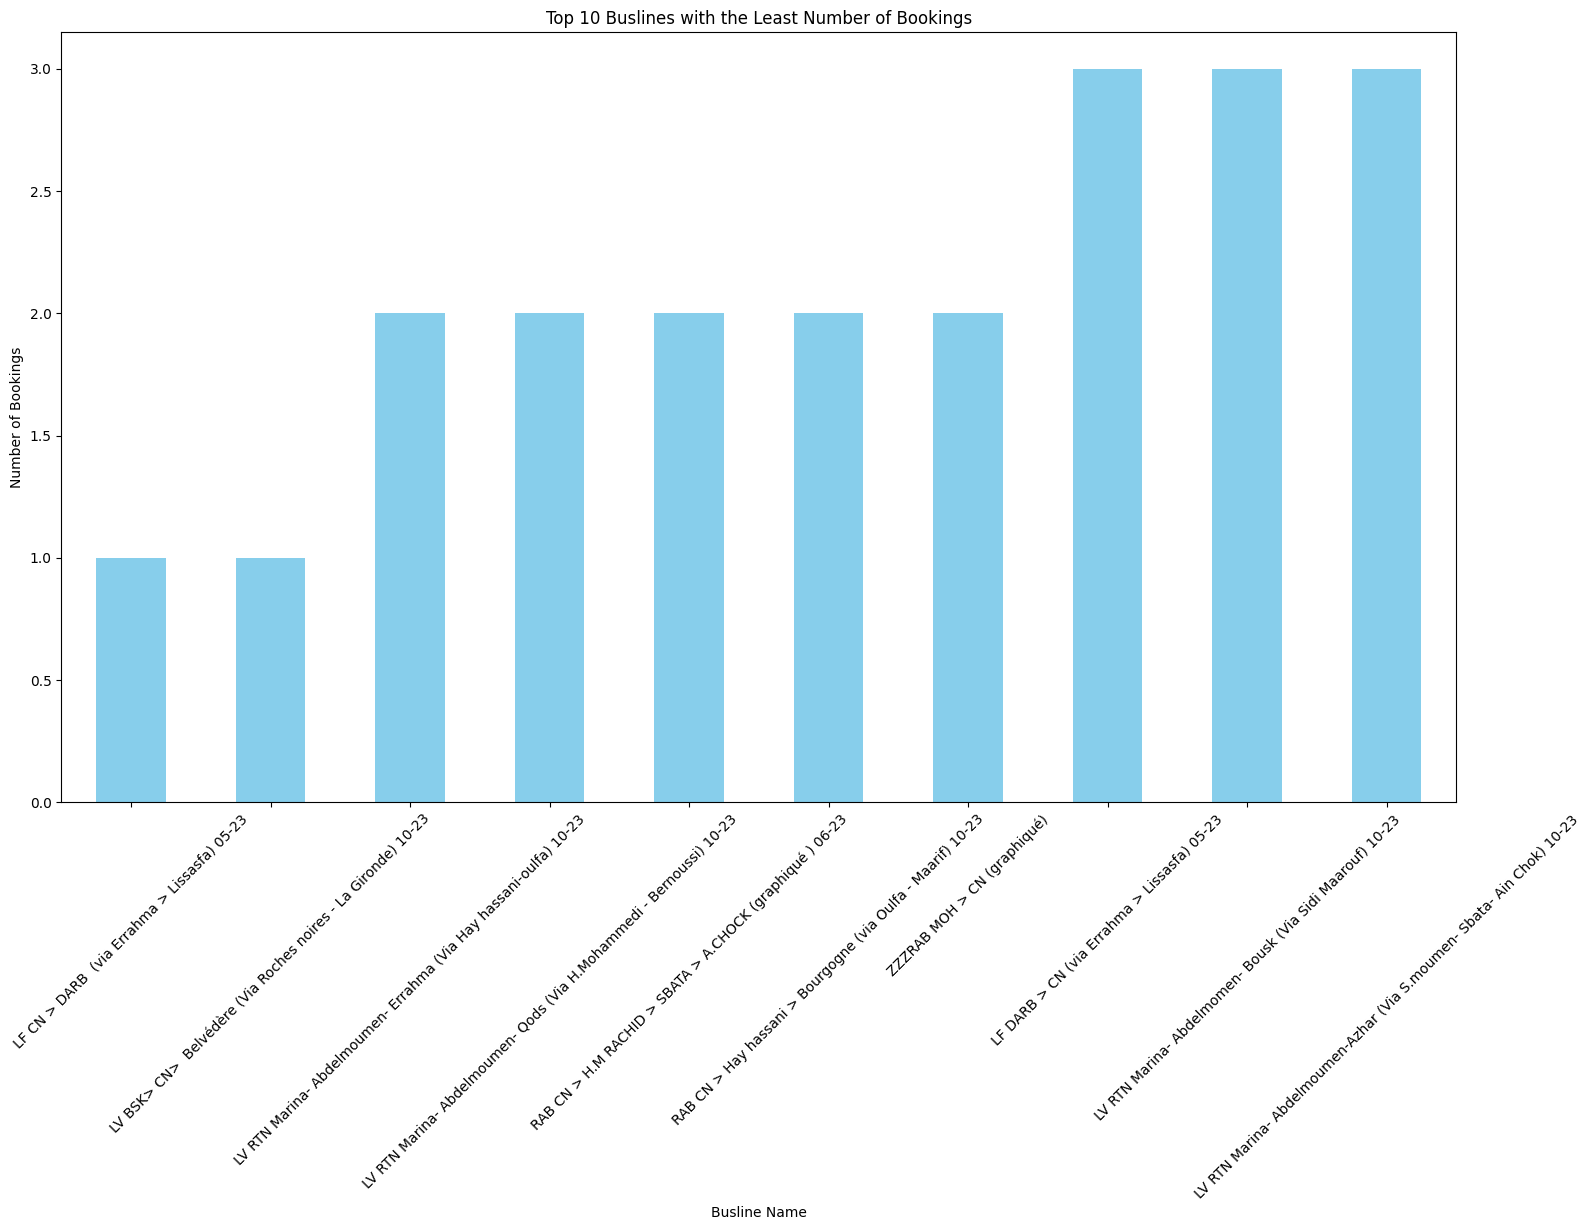

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with booking data

# Group by busline_name and calculate the total bookings
booking_count_by_busline = df.groupby('busline_name').size()

# Find the top 10 busline_names with the least number of bookings
top_10_least_booked_buslines = booking_count_by_busline.nsmallest(10)

# Plotting
plt.figure(figsize=(18, 10))
top_10_least_booked_buslines.plot(kind='bar', color='skyblue')
plt.title('Top 10 Buslines with the Least Number of Bookings')
plt.xlabel('Busline Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## Cancellation Analysis

In [26]:
df['booking_status'].unique()

['Ride Confirmed', 'Cancelled by driver', 'Cancelled by client', 'Cancelled by call center', 'Changed by admin', 'Changed by client', 'Cancelled by admin', 'Changed by call center']
Categories (8, object): ['Cancelled by admin', 'Cancelled by call center', 'Cancelled by client',
                         'Cancelled by driver', 'Changed by admin', 'Changed by call center',
                         'Changed by client', 'Ride Confirmed']

In [27]:
# Step 1: Determine the frequency of cancellations
cancellation_count = df[df['booking_status'].str.startswith('Cancelled')].shape[0]
print("Total number of cancellations:", cancellation_count)

Total number of cancellations: 1775


In [28]:
# Step 2: Identify the reasons for cancellations
user_cancellations = df[df['booking_status'].isin(['Cancelled by client', 'Cancelled by call center', 'Cancelled by admin'])].shape[0]
driver_cancellations = df[df['booking_status'] == 'Cancelled by driver'].shape[0]
other_cancellations = cancellation_count - user_cancellations - driver_cancellations
print("Number of user-initiated cancellations:", user_cancellations)
print("Number of driver-initiated cancellations:", driver_cancellations)
print("Number of cancellations for other reasons:", other_cancellations)

Number of user-initiated cancellations: 1345
Number of driver-initiated cancellations: 430
Number of cancellations for other reasons: 0


In [29]:
# Step 3: Examine the impact of cancellations on bus fill rates
# Calculate fill rate for each bus line (assuming 'busline_name' is the column representing bus lines)
fill_rates = df[df['booking_status'] == 'Ride Confirmed'].groupby('busline_name').size() / df.groupby('busline_name').size()
print("Fill rates for each bus line:")
fill_rates


Fill rates for each bus line:


busline_name
LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23           0.795918
LF BSK > CN > MOHAMEDIA 05-23                                 0.940000
LF CN > DARB  (via Errahma > Lissasfa) 05-23                  0.000000
LF DARB > CN (via Errahma > Lissasfa) 05-23                   1.000000
LV - OULFA > HH > CN 05-23                                    0.955118
                                                                ...   
ZZZRAB - Sidi Moumen Anassi Azhar > CasaNearShore             0.750000
ZZZRAB BERN - CN (via A.SEB)                                  0.901639
ZZZRAB CN > HH OULFA 05-23                                    0.843972
ZZZRAB MOH > CN (graphiqué)                                   0.500000
ZZZTEST - FREE - MOHAMMEDIA (retour) > Zenith > CN > Bousk    1.000000
Length: 81, dtype: float64

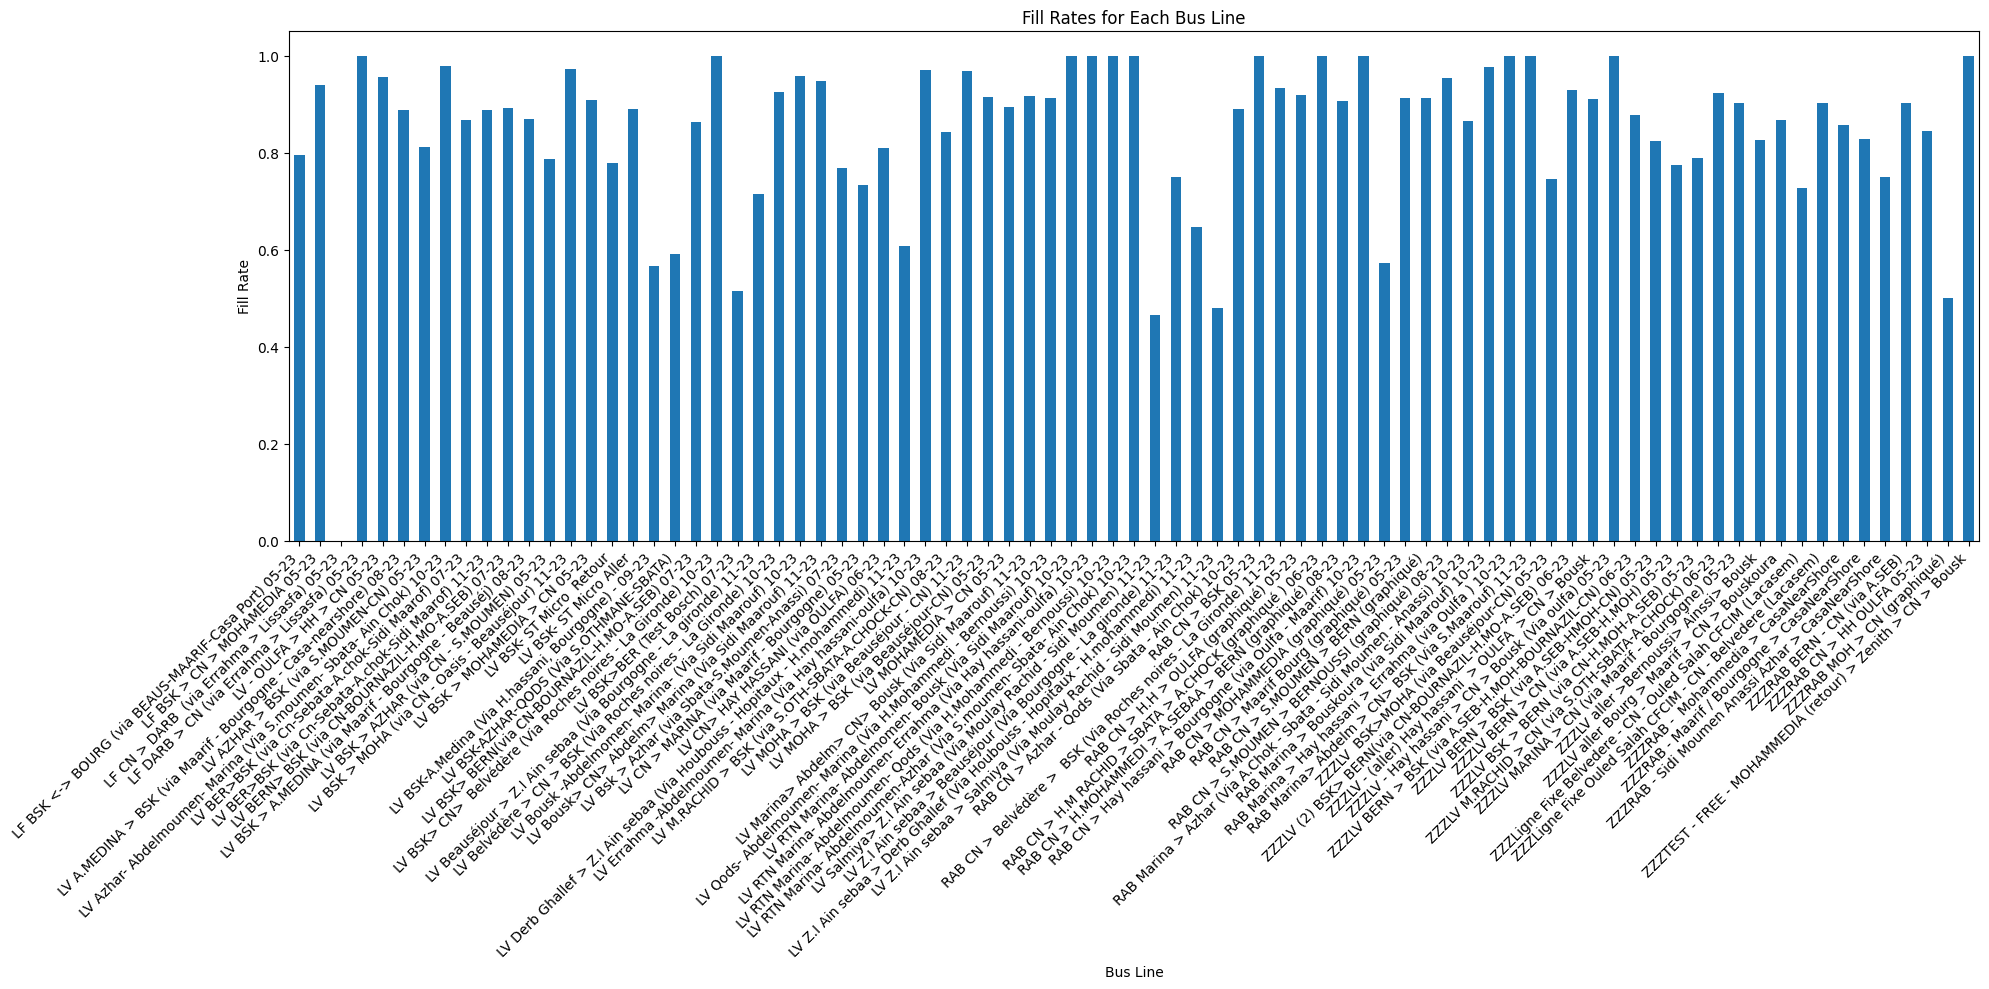

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'fill_rates' contains the calculated fill rates for each bus line

# Plot the fill rates
plt.figure(figsize=(20, 10))
fill_rates.plot(kind='bar')
plt.title('Fill Rates for Each Bus Line')
plt.xlabel('Bus Line')
plt.ylabel('Fill Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



1.   Highest Fill Rate:
* The bus line with the highest fill rate indicates that a significant portion of bookings for that bus line results in successful rides being confirmed.
* It suggests that this bus line is likely popular among passengers, and there is a high likelihood of passengers getting confirmed bookings when they make reservations for this bus line.
* A high fill rate can be indicative of efficient operations, good demand-supply balance, or effective management of cancellations and no-shows.

2.  Lowest Fill Rate:
* The bus line with the lowest fill rate indicates that a smaller proportion of bookings for that bus line results in successful rides being confirmed.
* It suggests that there may be issues such as overbooking, insufficient capacity, or high cancellation rates on this bus line.
* A low fill rate can lead to dissatisfaction among passengers, as they may face difficulties in getting confirmed bookings, leading to potential revenue loss and negative customer experiences.

**Check if cancellations have any relation with service ratings.**

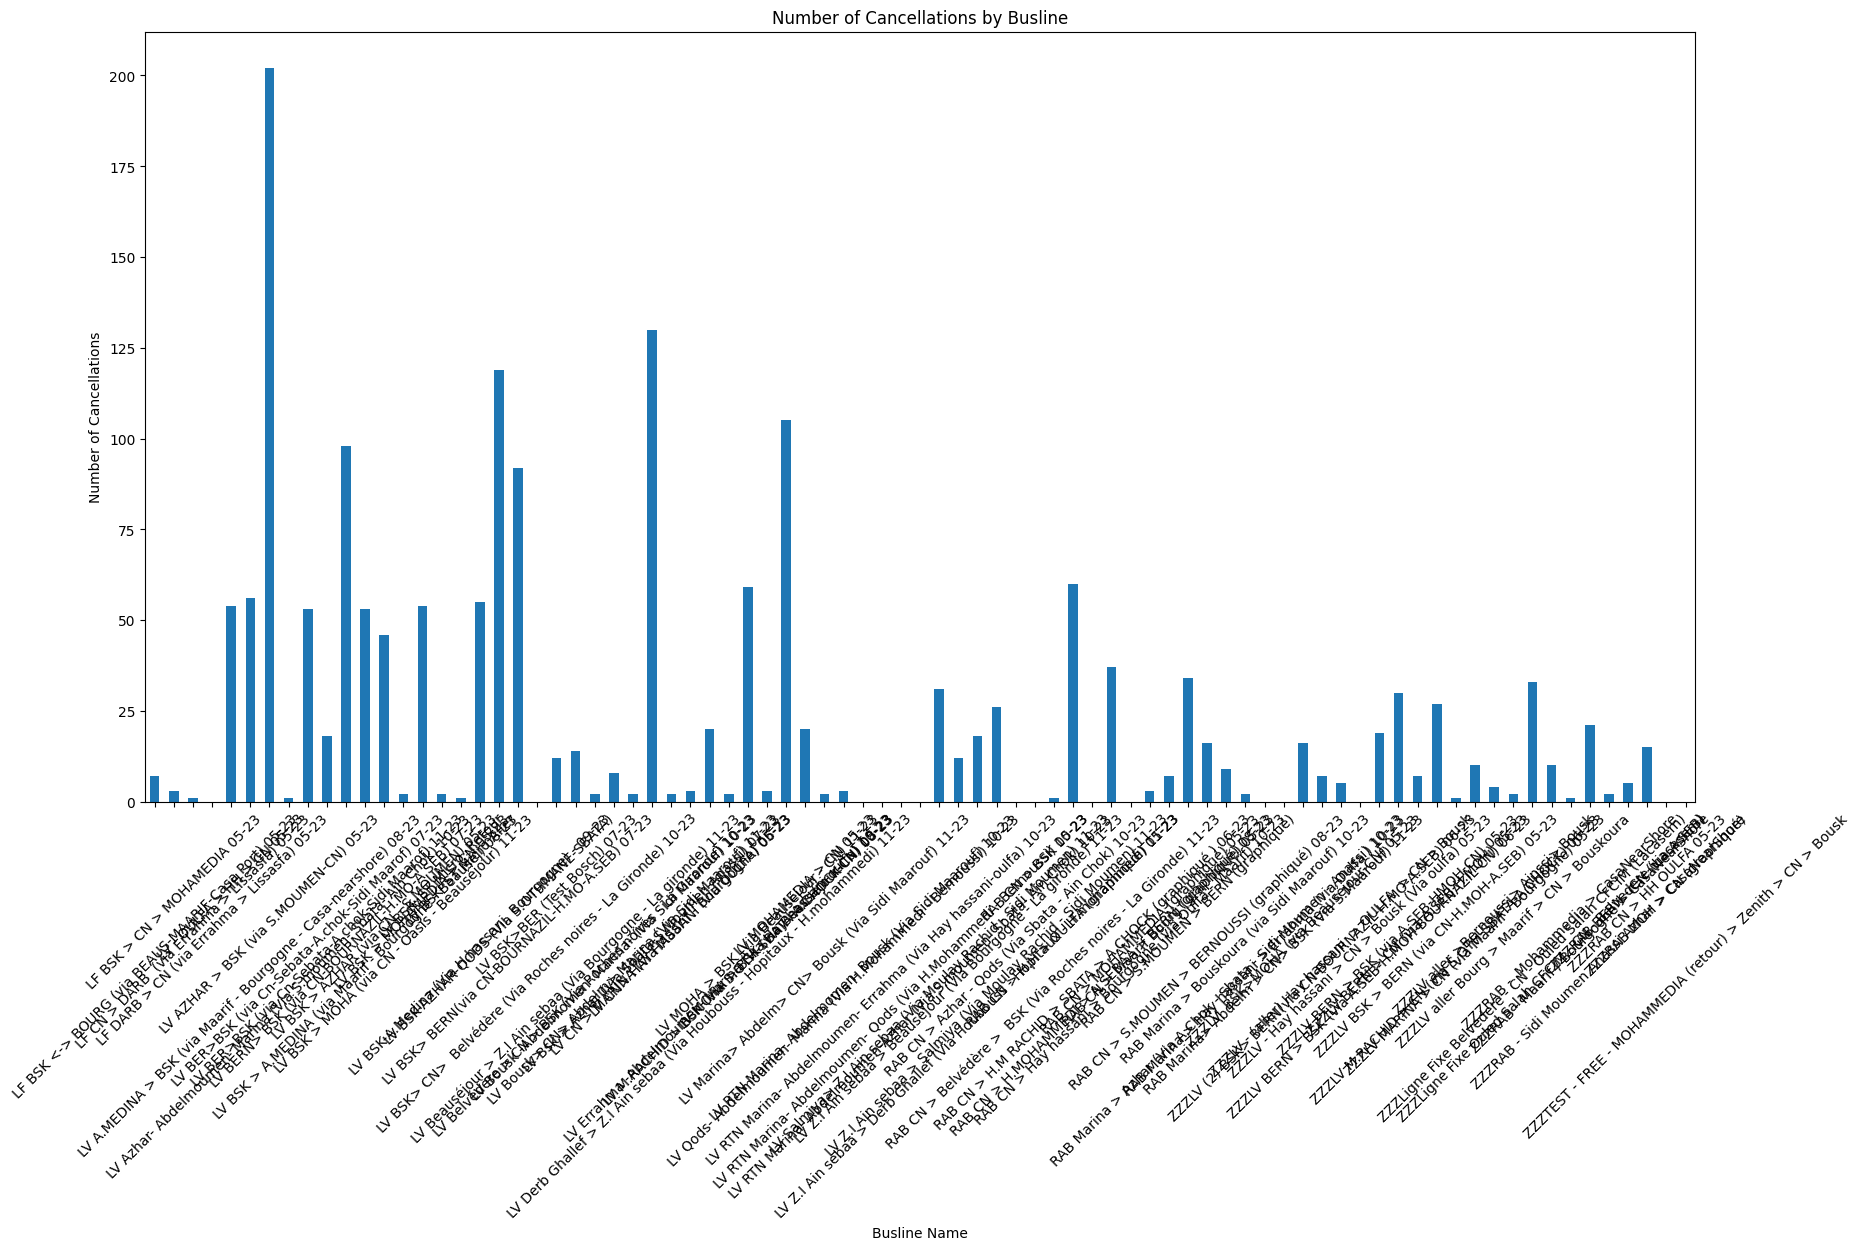

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with booking data

# Filter the DataFrame for canceled bookings
cancelled_bookings = df[df['booking_status'].isin(['Cancelled by client', 'Cancelled by call center', 'Cancelled by admin', 'Cancelled by driver'])]

# Group by busline_name and count the cancellations for each busline
cancellation_count_by_busline = cancelled_bookings.groupby('busline_name').size()

# Plotting
plt.figure(figsize=(20, 10))
cancellation_count_by_busline.plot(kind='bar')
plt.title('Number of Cancellations by Busline')
plt.xlabel('Busline Name')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


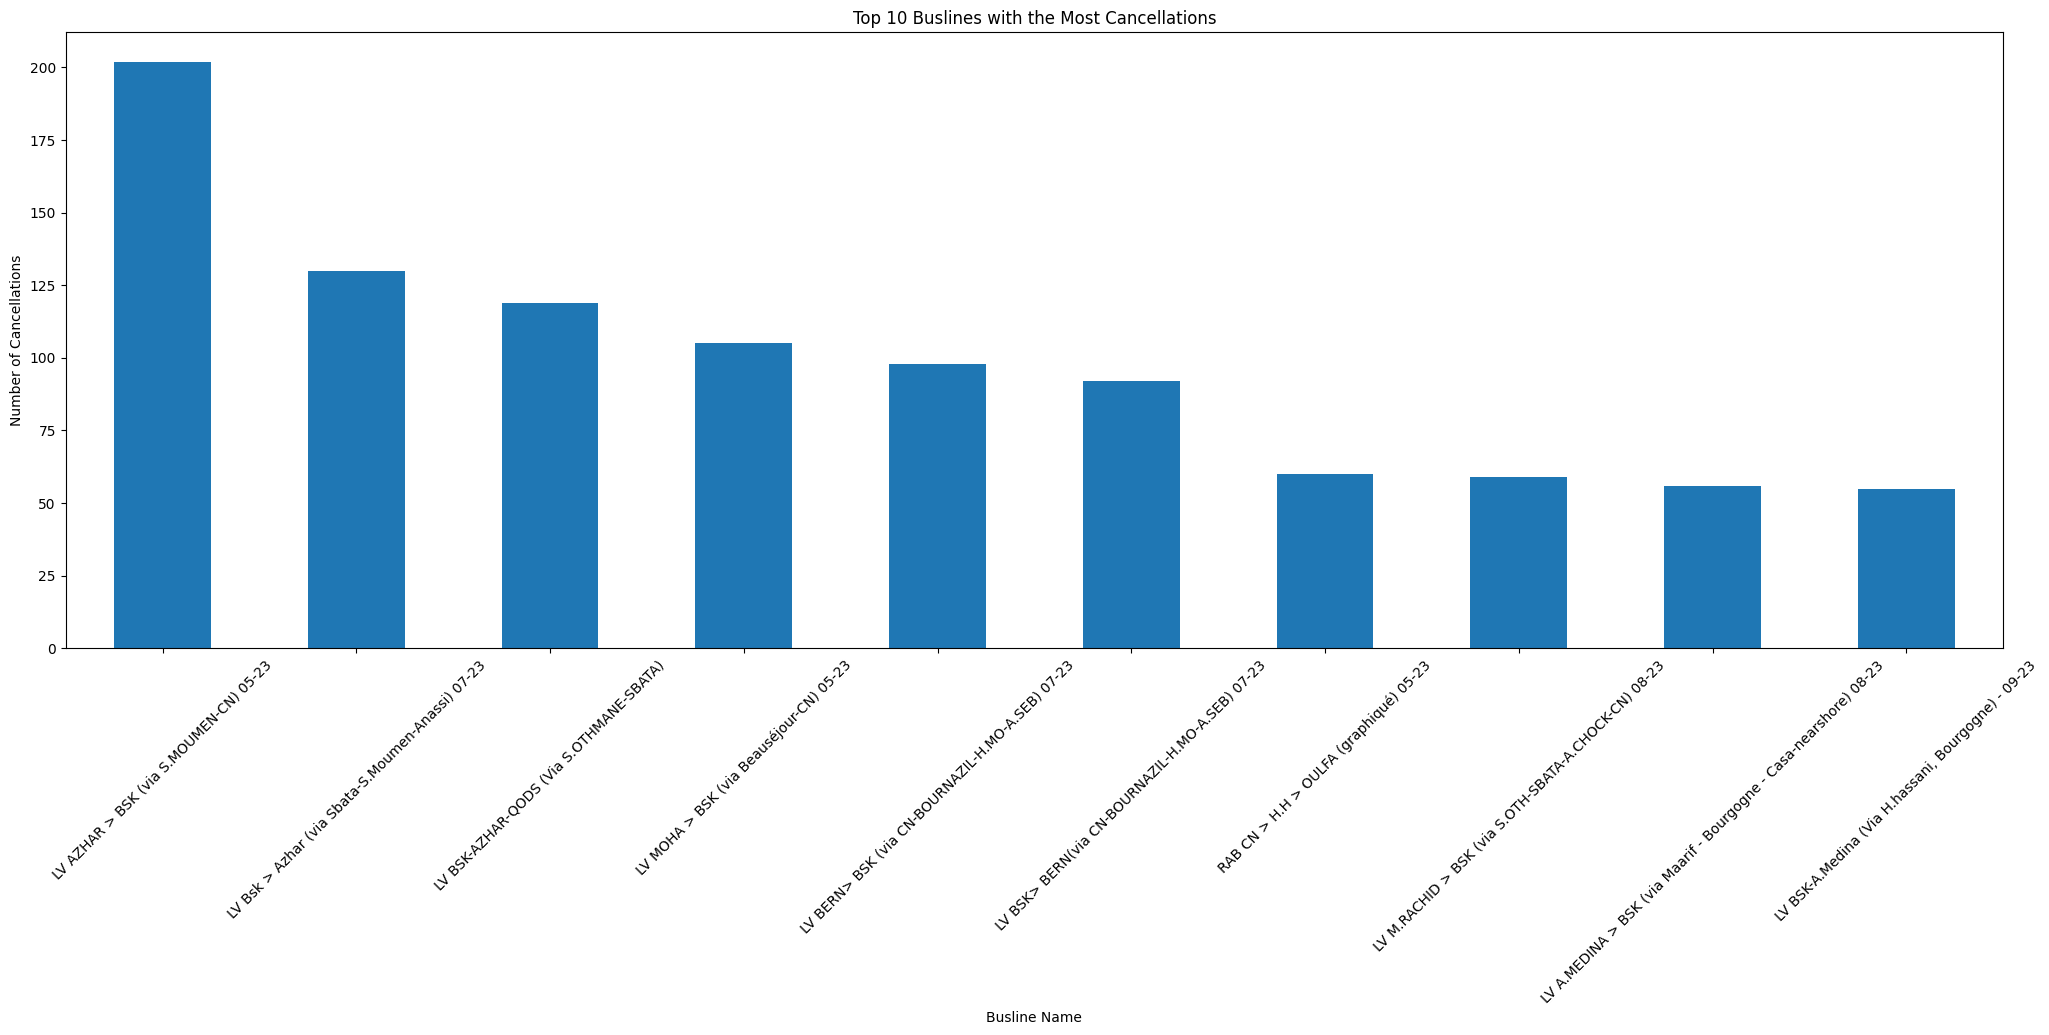

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with booking data

# Filter the DataFrame for canceled bookings
cancelled_bookings = df[df['booking_status'].isin(['Cancelled by client', 'Cancelled by call center', 'Cancelled by admin', 'Cancelled by driver'])]

# Group by busline_name and count the cancellations for each busline
cancellation_count_by_busline = cancelled_bookings.groupby('busline_name').size()

# Get the top 10 buslines with the most cancellations
top_10_buslines = cancellation_count_by_busline.nlargest(10)

# Plotting
plt.figure(figsize=(25, 8))
top_10_buslines.plot(kind='bar')
plt.title('Top 10 Buslines with the Most Cancellations')
plt.xlabel('Busline Name')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [33]:
df.head()

booked_from date_booking  number_passengers       booking_status  \
0  CALL_CENTER   2023-10-13                  1       Ride Confirmed   
1          APP   2023-10-15                  1       Ride Confirmed   
2  CALL_CENTER   2023-10-13                  1       Ride Confirmed   
3          APP   2023-10-15                  1       Ride Confirmed   
4  CALL_CENTER   2023-10-13                  1  Cancelled by driver   

  date_cancellation  user_id date_joined  \
0               NaN     1076  2023-03-31   
1               NaN     2289  2023-09-03   
2               NaN     1070  2023-03-31   
3               NaN     3237  2023-10-11   
4        2023-10-16     2283  2023-09-01   

                                   address_origin address_destination  \
0                                       Bernoussi     Bouskoura 27182   
1                 7 Rue du Rif، Mohammédia, Maroc                 CSN   
2                                     H.Assalam#2     Bouskoura 27182   
3                     MJWM+M84, Mohammédia, Maroc                 CSN   
4  334 Bd Ibn Tachfine, Casablanca 20560, Morocco           Bouskoura   

  is_user_anonymized  ... rating_service initial_price payment_mode  \
0              False  ...            NaN            30         ZERO   
1              False  ...            NaN            30       CREDIT   
2              False  ...            NaN            30         ZERO   
3              False  ...            NaN            30           CB   
4              False  ...            NaN            25         ZERO   

   discount_code                                   address_pickup  \
0        SEW1023        Amlak Bernoussi - Ecole primaire Al Marwa   
1            NaN               Mohammedia - Place de la Gare ONCF   
2        SEW1023                     Anassi - Commune Ahl Loghlam   
3            NaN                         Mohammedia - Café Nevsky   
4    LACASEM1023  H.mohammadi - Bd ibn tachfine ste générale oqba   

                                 address_dropoff booking_date booking_month  \
0              Bouskoura - Parc Industriel CFCIM   2023-10-13            10   
1                          Casa Nearshore - Ibis   2023-10-15            10   
2              Bouskoura - Parc Industriel CFCIM   2023-10-13            10   
3                          Casa Nearshore - Ibis   2023-10-15            10   
4  Bouskoura - Parc Industriel Oulad Salah CFCIM   2023-10-13            10   

  booking_day booking_weekday  
0          13               4  
1          15               6  
2          13               4  
3          15               6  
4          13               4  

[5 rows x 24 columns]

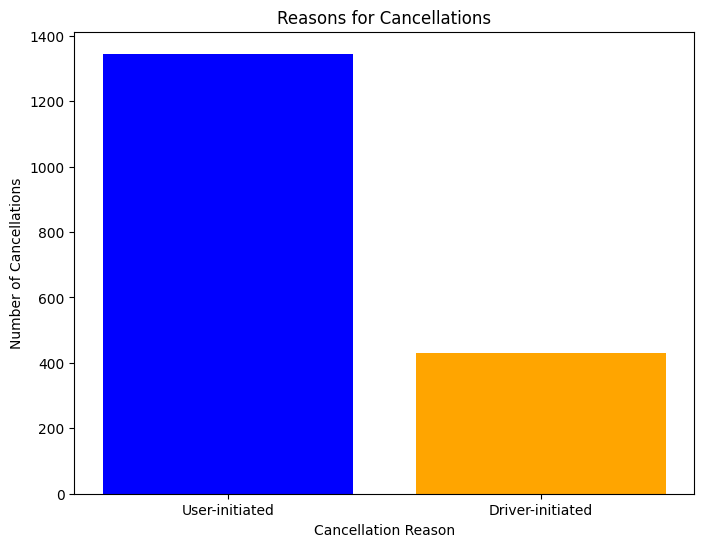

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Filter rows for user-initiated cancellations
user_cancellations = df[df['booking_status'].isin(['Cancelled by client', 'Cancelled by call center', 'Cancelled by admin'])]

# Filter rows for driver-initiated cancellations
driver_cancellations = df[df['booking_status'] == 'Cancelled by driver']

# Count the number of user-initiated and driver-initiated cancellations
user_cancellation_count = len(user_cancellations)
driver_cancellation_count = len(driver_cancellations)

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['User-initiated', 'Driver-initiated'], [user_cancellation_count, driver_cancellation_count], color=['blue', 'orange'])
plt.title('Reasons for Cancellations')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Cancellations')
plt.show()


Driver Name and count the cancellations for each Driver

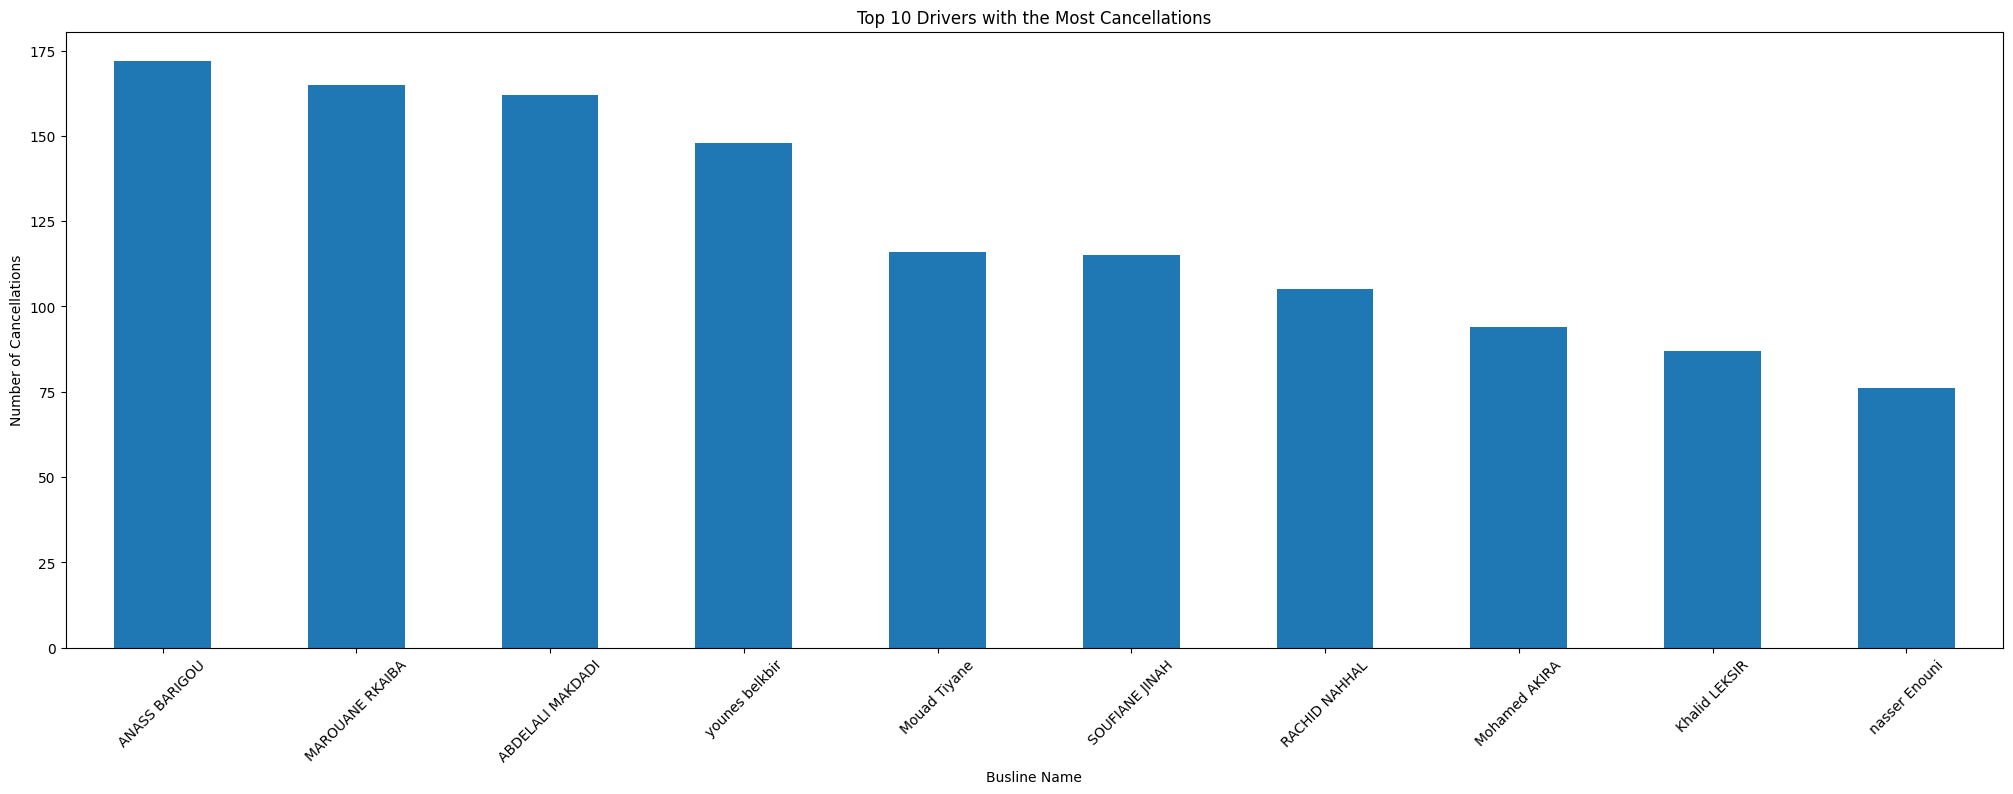

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with booking data

# Filter the DataFrame for canceled bookings
cancelled_bookings = df[df['booking_status'].isin(['Cancelled by client', 'Cancelled by call center', 'Cancelled by admin', 'Cancelled by driver'])]

# Group by busline_name and count the cancellations for each busline
cancellation_count_by_busline = cancelled_bookings.groupby('driver_name').size()

# Get the top 10 buslines with the most cancellations
top_10_buslines = cancellation_count_by_busline.nlargest(10)

# Plotting
plt.figure(figsize=(25, 8))
top_10_buslines.plot(kind='bar')
plt.title('Top 10 Drivers with the Most Cancellations')
plt.xlabel('Busline Name')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## User Behavior

Distribution of the number of passengers per booking:
1    16593
2       60
Name: number_passengers, dtype: int64


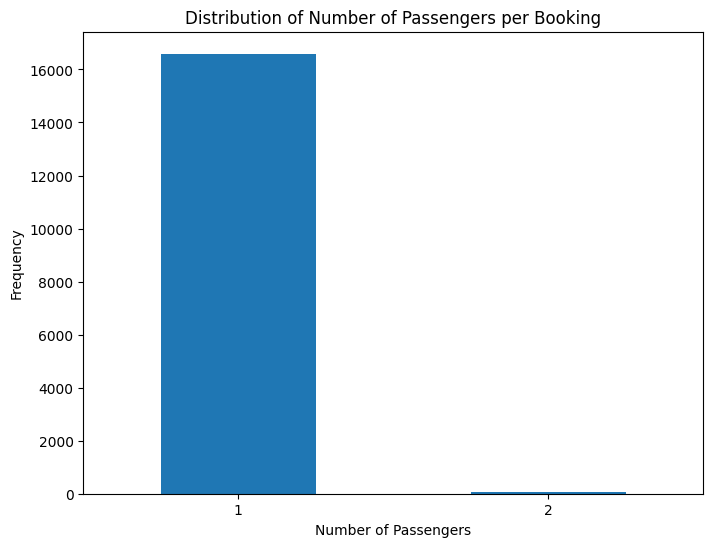

Average time gap between account creation and bookings: 85.02466573050857


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Study the distribution of the number of passengers per booking
passengers_distribution = df['number_passengers'].value_counts().sort_index()
print("Distribution of the number of passengers per booking:")
print(passengers_distribution)

# Plot the distribution of the number of passengers per booking
plt.figure(figsize=(8, 6))
passengers_distribution.plot(kind='bar')
plt.title('Distribution of Number of Passengers per Booking')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# Analyze user retention by examining the time gap between account creation and bookings
df['date_joined'] = pd.to_datetime(df['date_joined'])
df['date_booking'] = pd.to_datetime(df['date_booking'])
df['time_gap'] = (df['date_booking'] - df['date_joined']).dt.days
print("Average time gap between account creation and bookings:", df['time_gap'].mean())




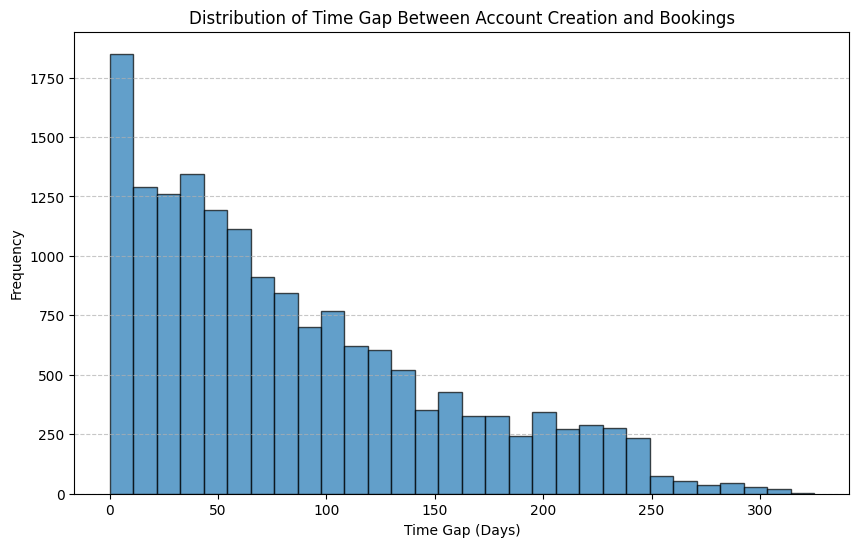

In [37]:
import pandas as pd

# Assuming df is your DataFrame with booking data
# Assuming user_account_creation_date is a column representing the date of account creation
# Assuming booking_date is a column representing the date of bookings

# Calculate the time gap between account creation and bookings
df['account_to_booking_time'] = (df['date_booking'] - df['date_joined']).dt.days

# Plotting the distribution of time gap between account creation and bookings
plt.figure(figsize=(10, 6))
plt.hist(df['account_to_booking_time'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Time Gap Between Account Creation and Bookings')
plt.xlabel('Time Gap (Days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**As we can notice, the likelihood of booking on the day of creating an account is much higher compared to booking after creating an account for a long time. This suggests that users are more likely to make bookings immediately after creating their accounts rather than waiting for an extended period before making a booking.**

In [38]:
# Investigate patterns in user behavior based on demographics or other factors
# You can analyze user behavior based on columns such as 'address_origin', 'address_destination', 'payment_mode', etc.
# For example, you can use groupby and aggregation functions to analyze behavior patterns based on demographics.

# Example of analyzing user behavior based on origin address
booking_count_by_origin = df.groupby('address_origin').size()
print("Booking count based on origin address:")

# Explore other relevant columns and analyze user behavior patterns accordingly


Booking count based on origin address:


<ipython-input-39-392bab659889>:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


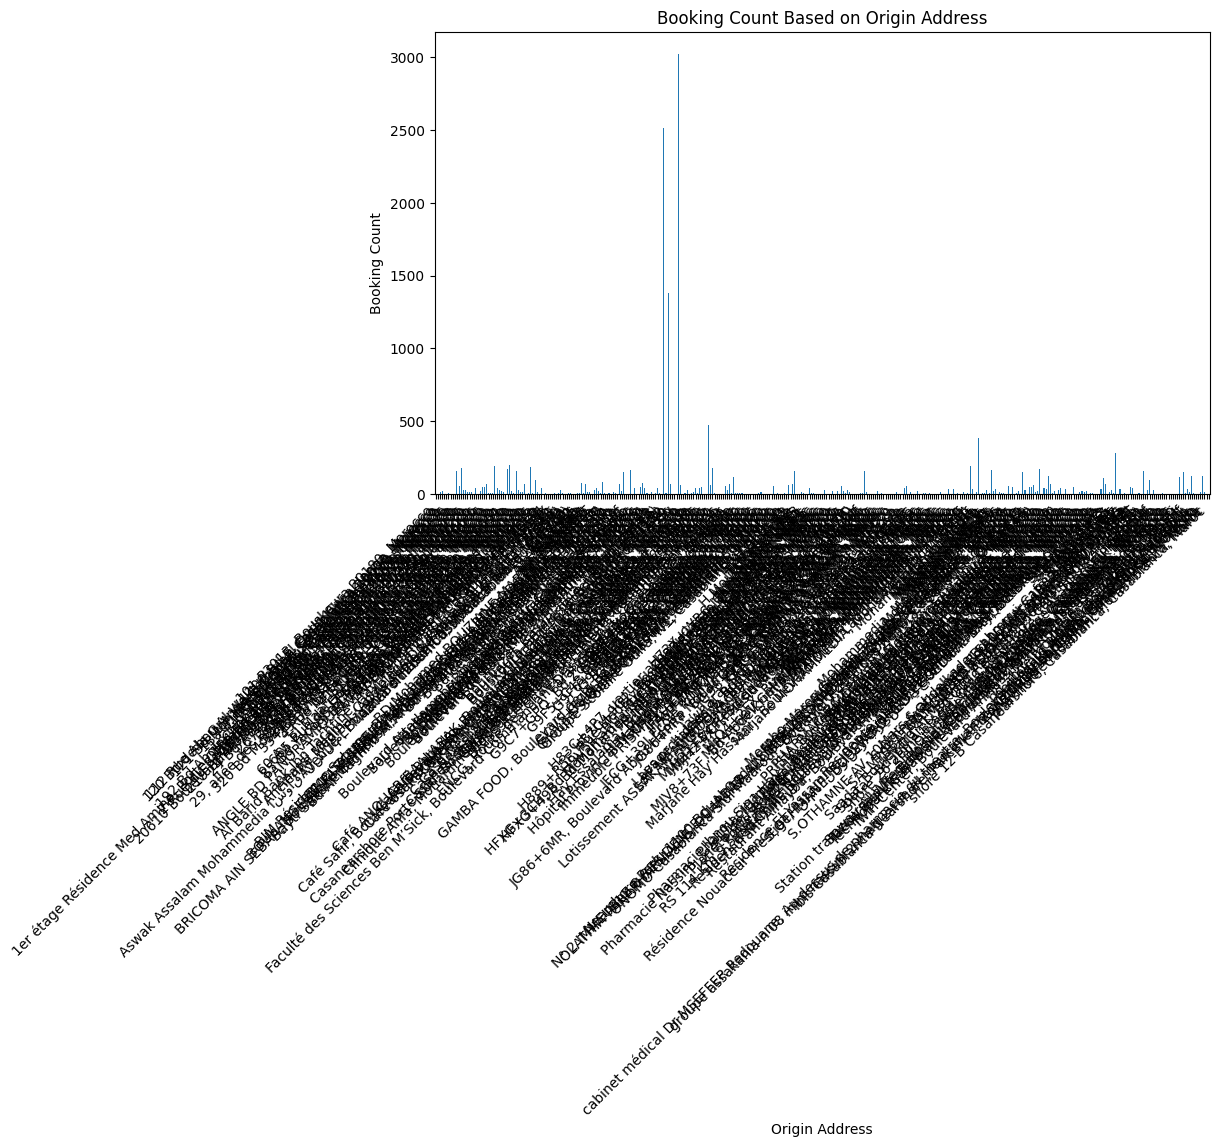

In [39]:
import matplotlib.pyplot as plt

# Example of analyzing user behavior based on origin address
booking_count_by_origin = df.groupby('address_origin').size()

# Plot the booking count based on origin address
plt.figure(figsize=(10, 6))
booking_count_by_origin.plot(kind='bar')
plt.title('Booking Count Based on Origin Address')
plt.xlabel('Origin Address')
plt.ylabel('Booking Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


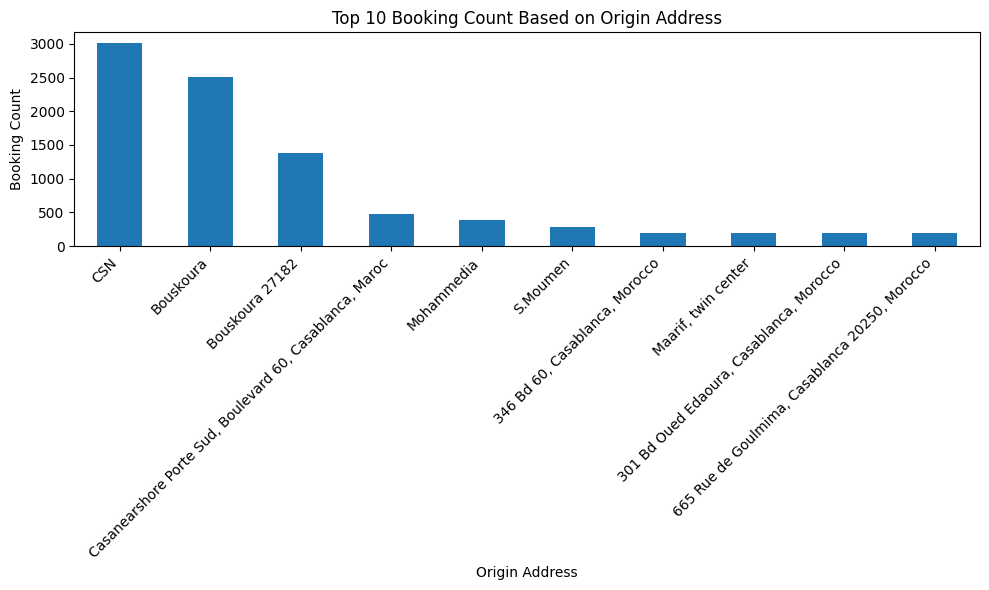

In [40]:
import matplotlib.pyplot as plt

# Example of analyzing user behavior based on origin address
booking_count_by_origin = df.groupby('address_origin').size()

# Select the top 10 values based on booking count
top_10_origin = booking_count_by_origin.nlargest(10)

# Plot the booking count for the top 10 origin addresses
plt.figure(figsize=(10, 6))
top_10_origin.plot(kind='bar')
plt.title('Top 10 Booking Count Based on Origin Address')
plt.xlabel('Origin Address')
plt.ylabel('Booking Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


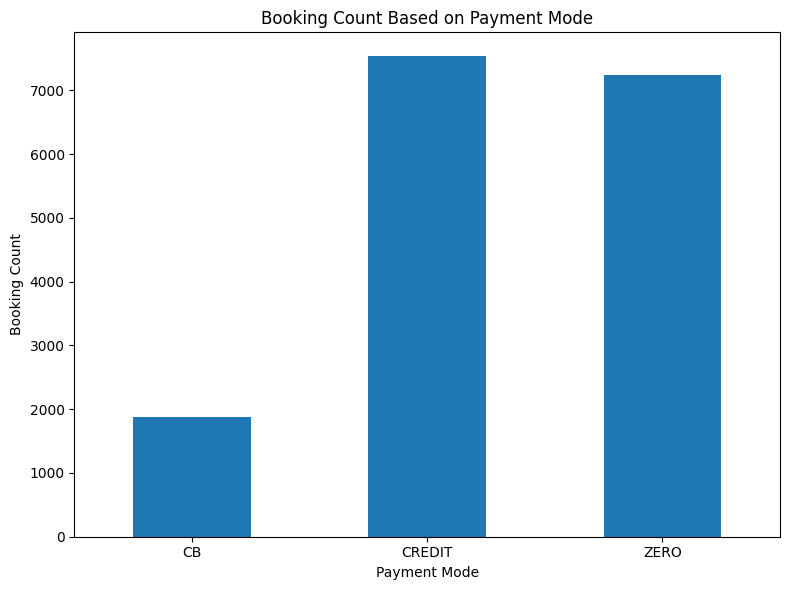

In [41]:
# Example of analyzing user behavior based on payment mode
booking_count_by_payment_mode = df.groupby('payment_mode').size()

#Plot the booking count based on payment mode
plt.figure(figsize=(8, 6))
booking_count_by_payment_mode.plot(kind='bar')
plt.title('Booking Count Based on Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Booking Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Explore other relevant columns and analyze user behavior patterns accordingly

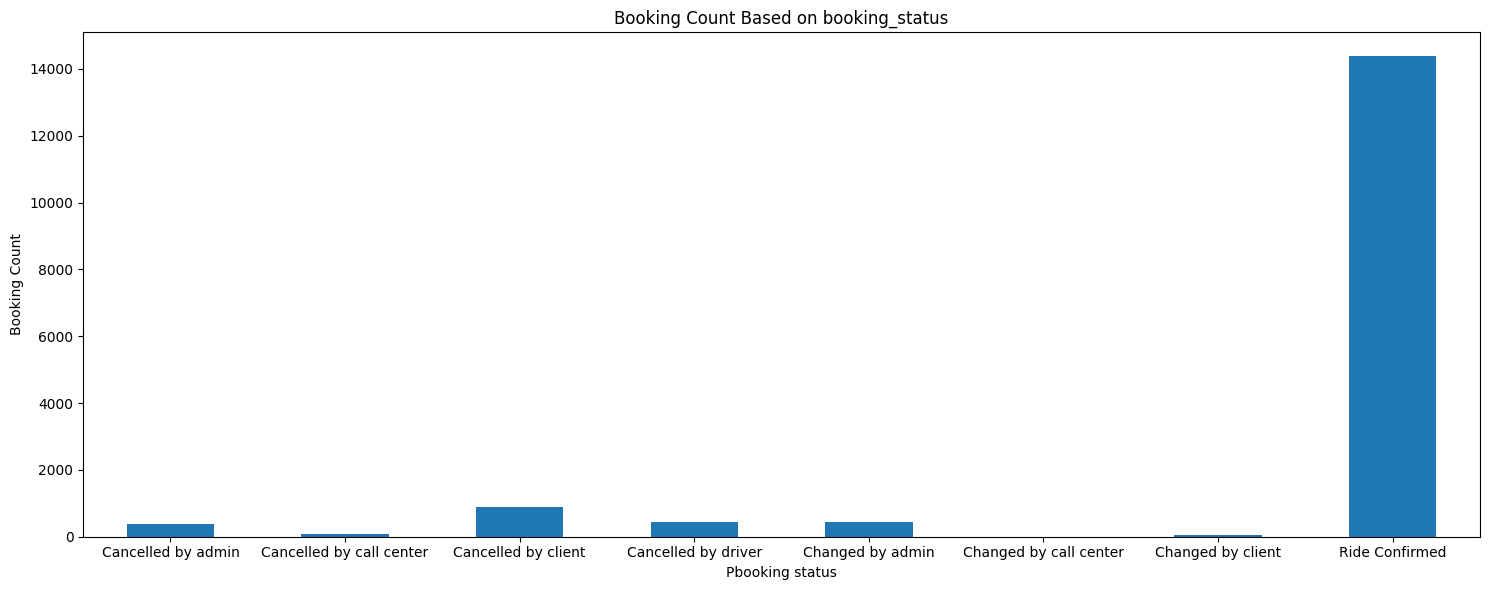

In [42]:
# Example of analyzing user behavior based on payment mode
booking_count_by_payment_mode = df.groupby('booking_status').size()

#Plot the booking count based on payment mode
plt.figure(figsize=(15, 6))
booking_count_by_payment_mode.plot(kind='bar')
plt.title('Booking Count Based on booking_status')
plt.xlabel('Pbooking status')
plt.ylabel('Booking Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Explore other relevant columns and analyze user behavior patterns accordingly

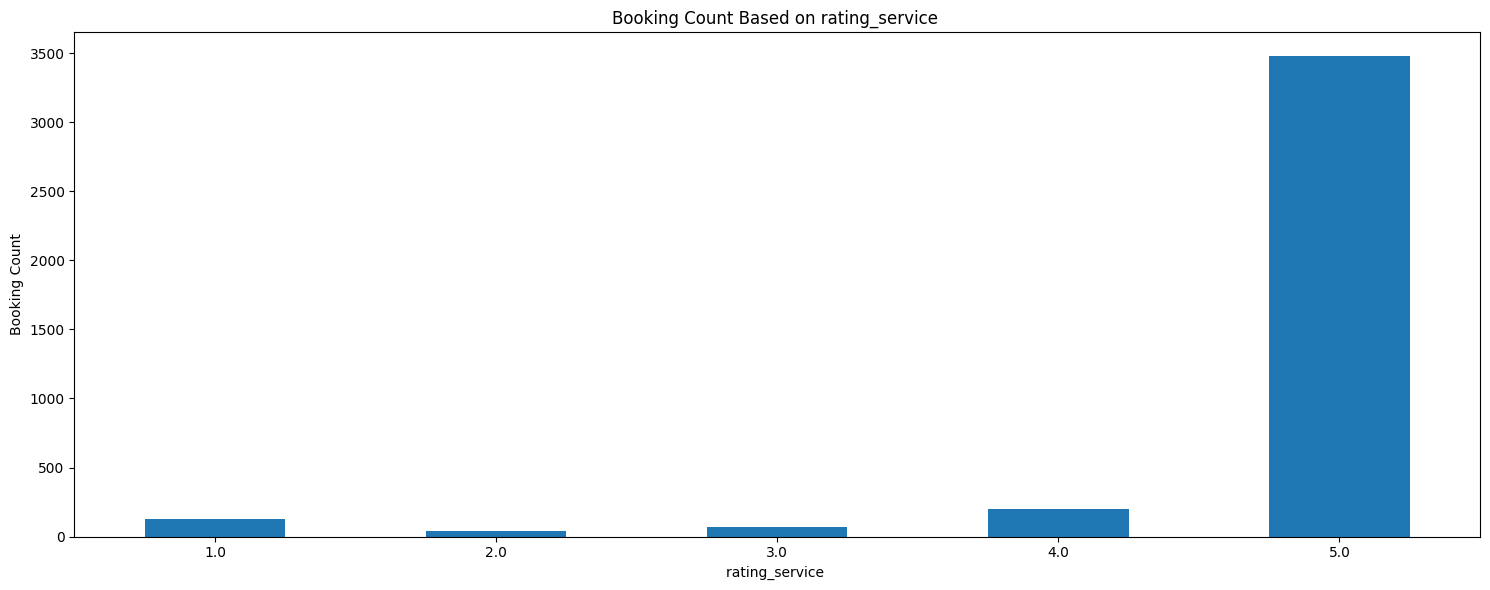

In [43]:
# Example of analyzing user behavior based on payment mode
booking_count_by_payment_mode = df.groupby('rating_service').size()

#Plot the booking count based on payment mode
plt.figure(figsize=(15, 6))
booking_count_by_payment_mode.plot(kind='bar')
plt.title('Booking Count Based on rating_service ')
plt.xlabel('rating_service ')
plt.ylabel('Booking Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Explore other relevant columns and analyze user behavior patterns accordingly

remove all the samples where 'rating_driver' is null from your DataFrame and store the filtered DataFrame in a new variable called 'datasets' and visualize the driver ratings based on driver names & the service ratings based on driver names .

In [44]:
# Remove samples where 'rating_driver' is null
datasets = df.dropna(subset=['rating_driver'])

# Check the shape of the new DataFrame to confirm that the null values have been removed
print("Shape of the new DataFrame:", datasets.shape)


Shape of the new DataFrame: (3899, 26)


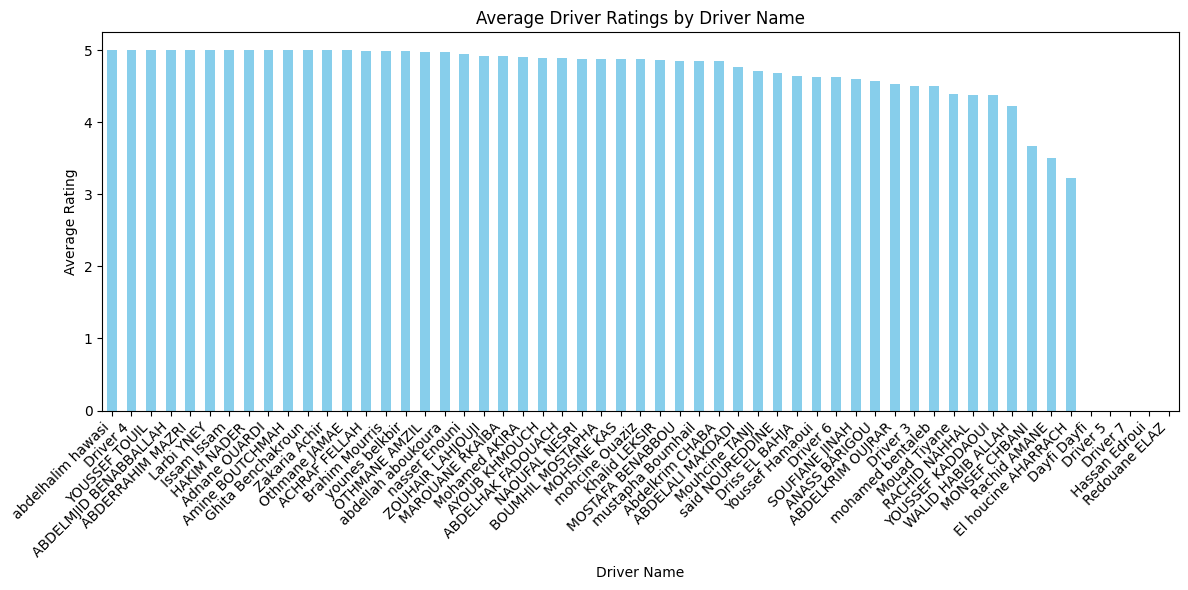

In [45]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Group by driver_name and calculate the average rating for each driver
average_rating_by_driver = datasets.groupby('driver_name')['rating_driver'].mean().sort_values(ascending=False)

# Plot the driver ratings based on driver names
plt.figure(figsize=(12, 6))
average_rating_by_driver.plot(kind='bar', color='skyblue')
plt.title('Average Driver Ratings by Driver Name')
plt.xlabel('Driver Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


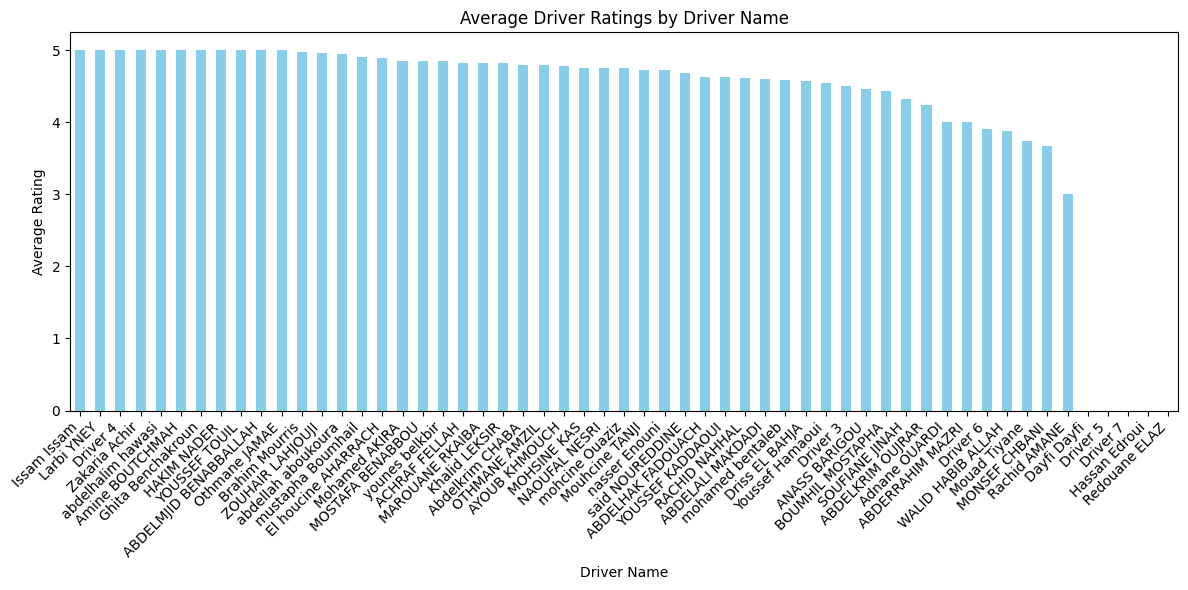

In [46]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Group by driver_name and calculate the average rating for each driver
average_rating_by_driver = datasets.groupby('driver_name')['rating_service'].mean().sort_values(ascending=False)

# Plot the service ratings based on driver names
plt.figure(figsize=(12, 6))
average_rating_by_driver.plot(kind='bar', color='skyblue')
plt.title('Average Driver Ratings by Driver Name')
plt.xlabel('Driver Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**We Faced a cas of '***positive skew***'This means that most of the ratings tend to be towards the higher end of the rating scale, indicating that users generally have positive opinions about the items being rated.**

## Decisions based on the results.

## Analyzing the booking patterns by ploting the distribution :

**We can conclude that the highest number of bookings in the year 2023 occurred in November, indicating a need for more resources in terms of vehicles and drivers compared to April, where fewer resources are required, allowing for better allocation of resources. Similarly, Fridays have a higher booking volume compared to Saturdays.**

**The distribution of the number of bookings in terms of buslines can help us determine where we should concentrate our resources.** **The majority of bookings are reserved for buslines such as** '*LV-OULFA > HH > CN 05-23', 'LV AZHAR > BSK (via S.MOUMEN-CN) 05-23*'**, and** '*LV MOHA > BSK (via Beauséjour-CN) 05-23*',**indicating a higher demand in these areas. Conversely, busline** '*LF CN > DARB (via Errahma > Lissasfa)*' **has a significantly lower number of bookings, suggesting that fewer resources are needed in this area.**


## cancellation Analysis:


**Perhaps we should consider changing the drivers assigned to the top 3 buslines with the most cancellations to ensure that the issue of cancellations is not related to the driver. Similarly, for the top 3 drivers with the most cancellations, we could try assigning them to different buslines to ensure that booking cancellations are not related to them.**

## User Behavior :

**The likelihood of booking on the day of creating an account is much higher compared to booking after the account has been created for a long time. This suggests that users are more inclined to make bookings immediately after creating their accounts rather than waiting for an extended period before doing so. Perhaps we should consider offering incentives or promotions to attract more clients when they create an account**.  

# Challenge 2: Busline performance (You have to write the query using SQL)

In [47]:
!pip install -q ipython-sql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00


In [75]:
import pandas as pd
import sqlite3

# Step 1: Upload the CSV file to Google Colab

# Step 2: Load the data into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Intern Assessment/bookings_data - bookings_data.csv')

# Step 3: Create a SQLite database and table
conn = sqlite3.connect('busline_data.db')
df.to_sql('busline_table', conn, index=False, if_exists='replace')

# Step 4: Insert data into the SQL table (if not using in-memory database)

# Step 5: Execute the SQL query
%load_ext sql
%sql sqlite:///busline_data.db


The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [76]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('busline_data.db')

# Create a cursor object
cursor = conn.cursor()

# Use a query to list tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the tables
tables = cursor.fetchall()

# Check if 'busline_table' is in the list of tables
if ('busline_table',) in tables:
    print("Table 'busline_table' was successfully created.")
else:
    print("Table 'busline_table' was not found.")

# Close the cursor and connection
cursor.close()
conn.close()


Table 'busline_table' was successfully created.


In [77]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('busline_data.db')


# Create a cursor object
cursor = conn.cursor()

# Use a query to select the first 3 rows from the table
cursor.execute("SELECT * FROM busline_table LIMIT 3")

# Fetch the selected rows
rows = cursor.fetchall()

# Print the selected rows
for row in rows:
    print(row)

# Close the cursor and connection
cursor.close()
conn.close()

(19294, 'CALL_CENTER', '2023-10-13', 1, 'Ride Confirmed', None, 1076, '2023-03-31', 'Bernoussi', 'Bouskoura 27182', 0, '2023-10-16', 'LV AZHAR > BSK (via S.MOUMEN-CN) 05-23', 'ANASS BARIGOU', None, None, 30, 'ZERO', 'SEW1023', 'Amlak Bernoussi - Ecole primaire Al Marwa', 'Bouskoura - Parc Industriel CFCIM')
(19468, 'APP', '2023-10-15', 1, 'Ride Confirmed', None, 2289, '2023-09-03', '7 Rue du Rif، Mohammédia, Maroc', 'CSN', 0, '2023-10-16', 'LV MOHA > BSK (via Beauséjour-CN) 05-23', 'younes belkbir', None, None, 30, 'CREDIT', None, 'Mohammedia - Place de la Gare ONCF', 'Casa Nearshore - Ibis')
(19264, 'CALL_CENTER', '2023-10-13', 1, 'Ride Confirmed', None, 1070, '2023-03-31', 'H.Assalam#2', 'Bouskoura 27182', 0, '2023-10-16', 'LV AZHAR > BSK (via S.MOUMEN-CN) 05-23', 'ANASS BARIGOU', None, None, 30, 'ZERO', 'SEW1023', 'Anassi - Commune Ahl Loghlam', 'Bouskoura - Parc Industriel CFCIM')


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17722 entries, 0 to 17721
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   booking_id           17722 non-null  int64  
 1   booked_from          17722 non-null  object 
 2   date_booking         17722 non-null  object 
 3   number_passengers    17722 non-null  int64  
 4   booking_status       17722 non-null  object 
 5   date_cancellation    1986 non-null   object 
 6   user_id              17722 non-null  int64  
 7   date_joined          17413 non-null  object 
 8   address_origin       17722 non-null  object 
 9   address_destination  17722 non-null  object 
 10  is_user_anonymized   17722 non-null  bool   
 11  date_ride            17722 non-null  object 
 12  busline_name         17561 non-null  object 
 13  driver_name          16686 non-null  object 
 14  rating_driver        3899 non-null   float64
 15  rating_service       3911 non-null  

In [103]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('busline_data.db')

# Create a cursor object
cursor = conn.cursor()

# Use a query to select the first 3 rows from the table
cursor.execute('''
WITH LaunchWeeks AS (
    SELECT
        busline_table.busline_name,
        MIN(busline_table.date_ride) AS launch_date
    FROM
        busline_table
    GROUP BY
        busline_table.busline_name
),
WeeklyFillRates AS (
    SELECT
        busline_table.busline_name,
        STRFTIME('%W', busline_table.date_ride) - STRFTIME('%W', launch_date) AS week_offset,
        COUNT(*) * 100.0 / (
            SELECT COUNT(*)
            FROM busline_table
            WHERE busline_table.busline_name = LaunchWeeks.busline_name
            AND STRFTIME('%W', busline_table.date_ride) - STRFTIME('%W', launch_date) = (STRFTIME('%W', busline_table.date_ride) - STRFTIME('%W', launch_date))
        ) AS fill_rate
    FROM
        busline_table
    JOIN
        LaunchWeeks ON busline_table.busline_name = LaunchWeeks.busline_name
    GROUP BY
        busline_table.busline_name, week_offset
)
SELECT
    busline_name,
    MAX(CASE WHEN week_offset = 0 THEN fill_rate ELSE NULL END) AS week_0,
    MAX(CASE WHEN week_offset = 1 THEN fill_rate ELSE NULL END) AS week_1,
    MAX(CASE WHEN week_offset = 2 THEN fill_rate ELSE NULL END) AS week_2,
    MAX(CASE WHEN week_offset = 3 THEN fill_rate ELSE NULL END) AS week_3,
    MAX(CASE WHEN week_offset = 4 THEN fill_rate ELSE NULL END) AS week_4,
    MAX(CASE WHEN week_offset = 5 THEN fill_rate ELSE NULL END) AS week_5,
    MAX(CASE WHEN week_offset = 6 THEN fill_rate ELSE NULL END) AS week_6
FROM
    WeeklyFillRates
GROUP BY
    busline_name;
''')

# Fetch the selected rows
rows = cursor.fetchall()

# Close the cursor and connection
cursor.close()
conn.close()


In [81]:
def print_table(data, header=None):
    # Determine the maximum width of each column
    column_widths = [max(len(str(item)) for item in col) for col in zip(*data)]

    # Print the table header if provided
    if header:
        print("+-" + "-+-".join("-" * width for width in column_widths) + "-+")
        print("| " + " | ".join(str(item).ljust(width) for item, width in zip(header, column_widths)) + " |")
        print("+-" + "-+-".join("-" * width for width in column_widths) + "-+")

    # Print each row of the table
    for row in data:
        print("| " + " | ".join(str(item).ljust(width) for item, width in zip(row, column_widths)) + " |")

    # Print the table footer
    print("+-" + "-+-".join("-" * width for width in column_widths) + "-+")

# Print the list as a table with header
print_table(rows, header=["Busline", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

+-------------------------------------------------------------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
| Busline                                                                       | Monday             | Tuesday            | Wednesday          | Thursday           | Friday              | Saturday           | Sunday             |
+-------------------------------------------------------------------------------+--------------------+--------------------+--------------------+--------------------+---------------------+--------------------+--------------------+
| LF BSK <-> BOURG (via BEAUS-MAARIF-Casa Port) 05-23                           | 29.09090909090909  | 20.0               | 7.2727272727272725 | 18.181818181818183 | 3.6363636363636362  | 14.545454545454545 | 7.2727272727272725 |
| LF BSK > CN > MOHAMEDIA 05-23                                                 

In [84]:
print(type(rows))


<class 'list'>


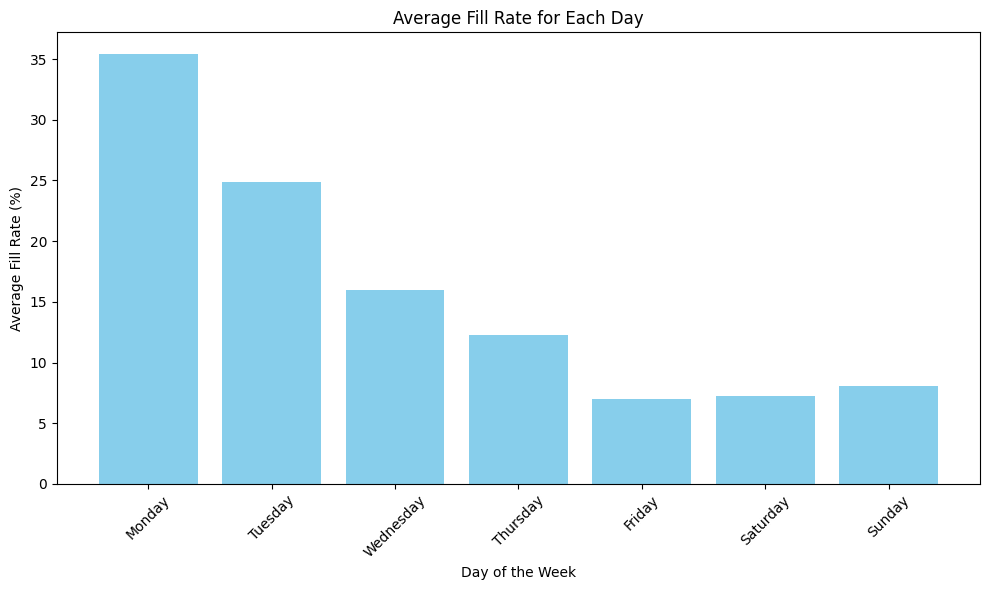

In [90]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_fill_rate(data):
    # Define the days of the week
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Extract the fill rates for each day from the data
    fill_rates_transposed = list(zip(*[row[1:] for row in data]))

    # Calculate the average fill rate for each day
    avg_fill_rates = []
    for fill_rates in fill_rates_transposed:
        # Filter out None values and calculate average for non-None values
        fill_rates_filtered = [value for value in fill_rates if value is not None]
        if fill_rates_filtered:
            avg_fill_rates.append(np.mean(fill_rates_filtered))
        else:
            avg_fill_rates.append(None)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(days_of_week, avg_fill_rates, color='skyblue')

    # Add labels and title
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Fill Rate (%)')
    plt.title('Average Fill Rate for Each Day')

    # Show plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()


# Visualize the average fill rate for each day
visualize_fill_rate(rows)


## Top 10 Bus Lines based on Average Fill Rate

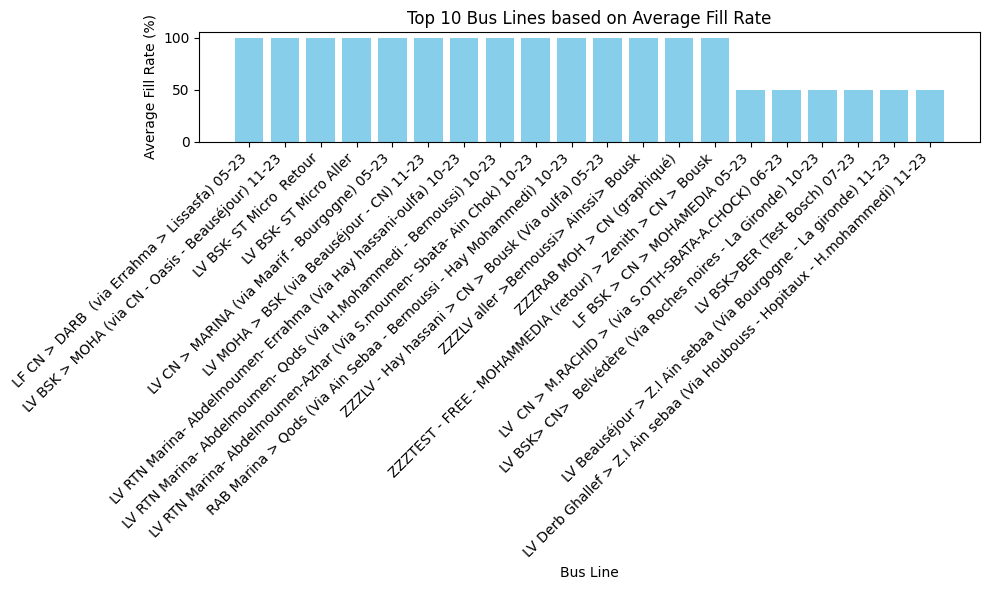

In [97]:
import matplotlib.pyplot as plt

def plot_top_buslines(data, n=10):
    # Calculate the average fill rate for each bus line
    avg_fill_rates = []
    for entry in data:
        fill_rates = [value for value in entry[1:] if value is not None]
        avg_fill_rate = sum(fill_rates) / len(fill_rates) if fill_rates else 0
        avg_fill_rates.append((entry[0], avg_fill_rate))

    # Sort the bus lines based on average fill rate
    sorted_buslines = sorted(avg_fill_rates, key=lambda x: x[1], reverse=True)

    # Extract the top n bus lines and their average fill rates
    top_buslines = [entry[0] for entry in sorted_buslines[:n]]
    top_fill_rates = [entry[1] for entry in sorted_buslines[:n]]

    # Plot the top n bus lines
    plt.figure(figsize=(10, 6))
    plt.bar(top_buslines, top_fill_rates, color='skyblue')

    # Add labels and title
    plt.xlabel('Bus Line')
    plt.ylabel('Average Fill Rate (%)')
    plt.title('Top 10 Bus Lines based on Average Fill Rate')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()


# Plot the top 10 bus lines based on average fill rate
plot_top_buslines(rows, n=20)


## Bus Lines with Fill Rate Below 50%




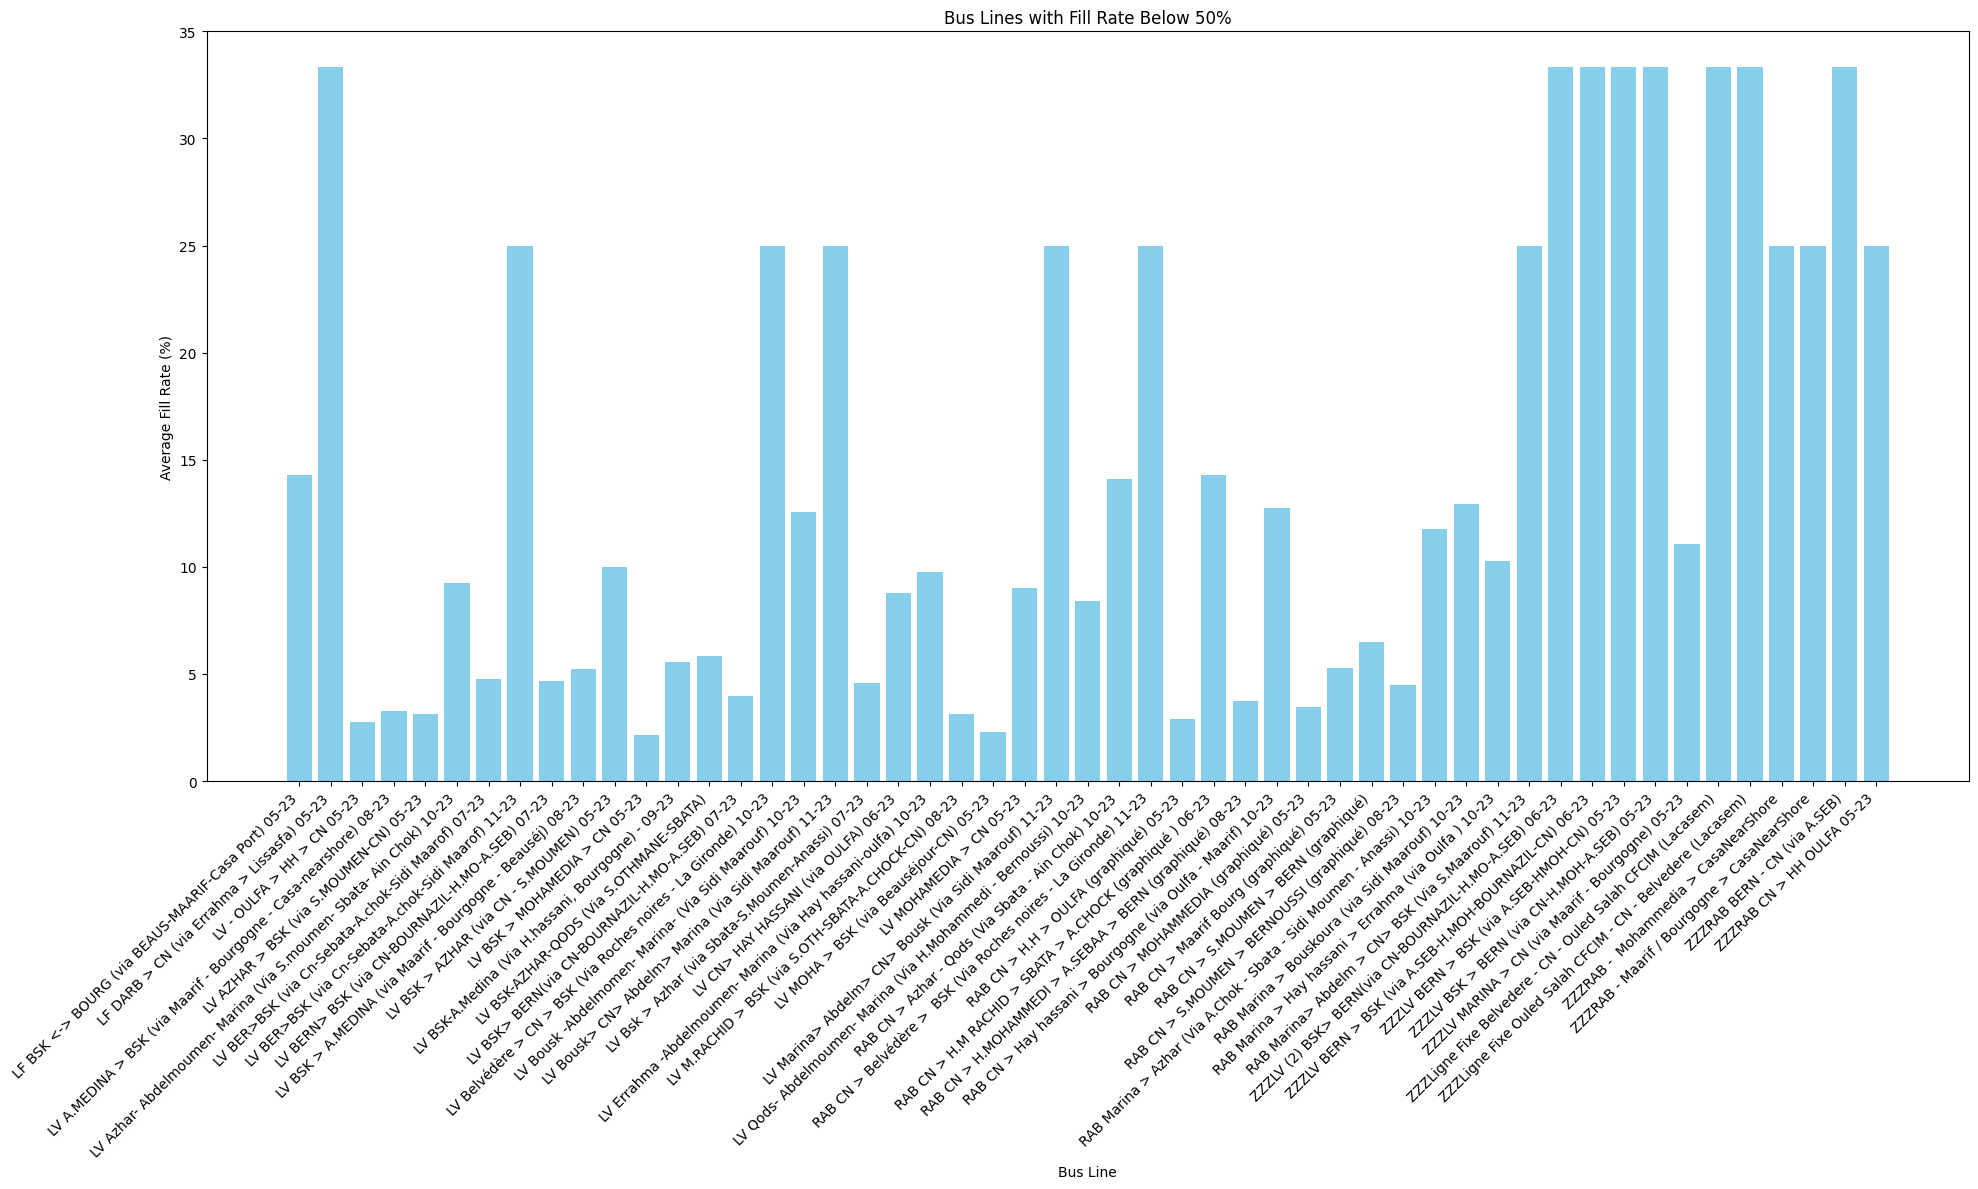

In [100]:
import matplotlib.pyplot as plt

def plot_buslines_below_threshold(data, threshold=50):
    # Calculate the average fill rate for each bus line
    avg_fill_rates = []
    for entry in data:
        fill_rates = [value for value in entry[1:] if value is not None]
        avg_fill_rate = sum(fill_rates) / len(fill_rates) if fill_rates else 0
        avg_fill_rates.append((entry[0], avg_fill_rate))

    # Filter out bus lines with average fill rate greater than or equal to the threshold
    buslines_below_threshold = [(busline, avg_fill_rate) for busline, avg_fill_rate in avg_fill_rates if avg_fill_rate < threshold]

    # If there are no bus lines below the threshold, print a message and return
    if not buslines_below_threshold:
        print("No bus lines have an average fill rate below {}%.".format(threshold))
        return

    # Extract the bus lines and their average fill rates below the threshold
    buslines = [entry[0] for entry in buslines_below_threshold]
    fill_rates = [entry[1] for entry in buslines_below_threshold]

    # Plot the bus lines below the threshold
    plt.figure(figsize=(20, 12))
    plt.bar(buslines, fill_rates, color='skyblue')

    # Add labels and title
    plt.xlabel('Bus Line')
    plt.ylabel('Average Fill Rate (%)')
    plt.title('Bus Lines with Fill Rate Below {}%'.format(threshold))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()



# Plot the bus lines where fill rate is less than 50%
plot_buslines_below_threshold(rows, threshold=50)


## Top 10 Bus Lines with Lowest Average Fill Rates

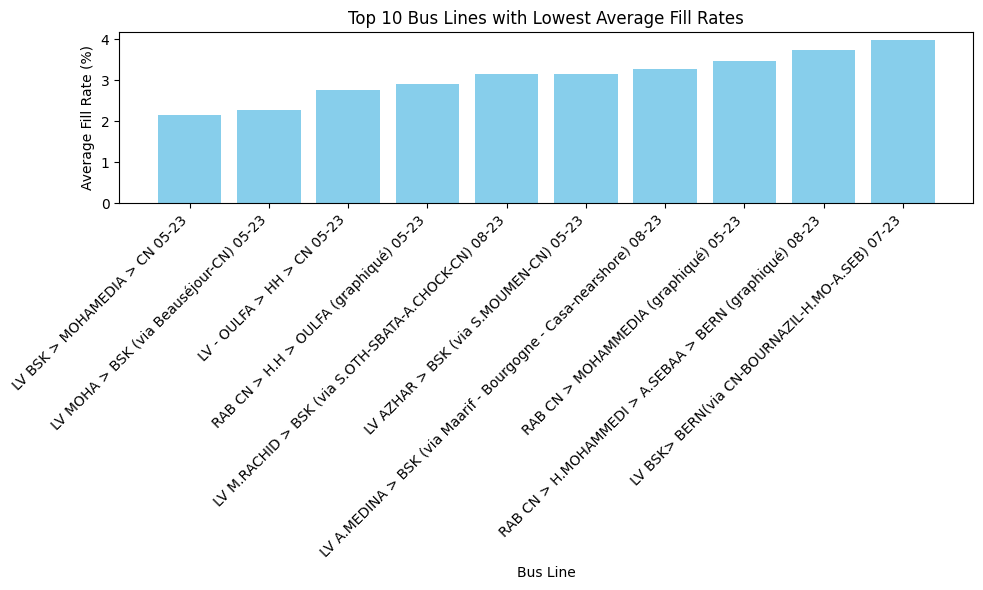

In [102]:
import matplotlib.pyplot as plt

def plot_top_buslines_lowest_fill_rates(data, n=10):
    # Calculate the average fill rate for each bus line
    avg_fill_rates = []
    for entry in data:
        fill_rates = [value for value in entry[1:] if value is not None]
        avg_fill_rate = sum(fill_rates) / len(fill_rates) if fill_rates else 0
        avg_fill_rates.append((entry[0], avg_fill_rate))

    # Sort the bus lines based on average fill rate in ascending order
    sorted_buslines = sorted(avg_fill_rates, key=lambda x: x[1])

    # Extract the top n bus lines with the lowest average fill rates
    top_buslines = [entry[0] for entry in sorted_buslines[:n]]
    top_fill_rates = [entry[1] for entry in sorted_buslines[:n]]

    # Plot the top n bus lines with the lowest average fill rates
    plt.figure(figsize=(10, 6))
    plt.bar(top_buslines, top_fill_rates, color='skyblue')

    # Add labels and title
    plt.xlabel('Bus Line')
    plt.ylabel('Average Fill Rate (%)')
    plt.title('Top 10 Bus Lines with Lowest Average Fill Rates')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Show plot
    plt.tight_layout()
    plt.show()


# Plot the top 10 bus lines with the lowest average fill rates
plot_top_buslines_lowest_fill_rates(rows, n=10)


# Challenge 3: Conclusions and perspectives

Summarise in 5 sentences what you've learned from the data and what you think we should explore and focus on next, and why.

## **Now, with these plots, we gain clear insight into the fill rates of each bus line and can identify areas of high demand for the service. Based on this information, we can allocate our resources more effectively by focusing on bus lines with a 100% fill rate. Conversely, we may consider discontinuing or exploring new bus lines in areas where the fill rate is significantly lower, such as 'LV BSK > MOHAMEDIA > CN 05-23', where only 2% (4 users) utilize this route.**

##  Brief summary :

  >* Offering incentives or promotions to attract more clients when they create an account.
  >* Allocating more resources to bus lines with a 100% fill rate.
  >* Considering removal of bus lines with very low fill rates or exploring new areas.
  >* Adjusting resource allocation to concentrate more on November and less on April. Additionally, Fridays exhibit higher booking volumes compared to Saturdays.
  >* Considering changes to the drivers to assess if it affects the cancellation rate.

# End  :)